In [1]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import matplotlib.pyplot as plt
import xlrd

In [2]:
gene_region = pd.read_csv("/home/zihend1/scENCORE/SelectGenes/gene.regions.hg38.sorted.bed", sep="\t", names=["chr", "start", "end", "gene"])

In [3]:
bin_df = pd.read_csv("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/gap.blacklist.hg38.1000000.4col.autosomal.bed", sep='\t', names=["chr","start","end","name"])
delete_bins = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/delete_bins.npy")
bin_df_new = bin_df.drop(delete_bins).reset_index(drop=True)

In [4]:
ptsd_con = pg.read_input('/lv_scratch/scratch/share/ptsd_con.zarr')
ptsd_con.obs['condition_merge'] = ptsd_con.obs['condition_merge'].cat.remove_unused_categories()
ptsd_con

2022-08-02 19:01:05,615 - pegasusio.readwrite - INFO - zarr file '/lv_scratch/scratch/share/ptsd_con.zarr' is loaded.
2022-08-02 19:01:05,616 - pegasusio.readwrite - INFO - Function 'read_input' finished in 1.28s.


MultimodalData object with 1 UnimodalData: 'GRCh38-rna'
    It currently binds to UnimodalData object GRCh38-rna

UnimodalData object with n_obs x n_vars = 56818 x 27951
    Genome: GRCh38; Modality: rna
    It contains 2 matrices: 'X', 'raw.X'
    It currently binds to matrix 'X' as X

    obs: 'n_genes', 'n_counts', 'Channel', 'percent_mito', 'scale', 'doublet', 'doublet_score', 'Group', 'leiden_labels', 'hodge_anno', 'lake_anno', 'nenad_anno', 'fine_clusters', 'subclass', 'condition_merge', 'AgeDeath', 'Sex', 'Smoking', 'Antidepressant', 'PMI', 'RIN', 'celltype'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'gmeans', 'gstds', 'means', 'partial_sum', 'de_res'
    uns: 'genome', 'modality', 'pca_features'

In [5]:
workbook = xlrd.open_workbook("/home/zihend1/scENCORE/SelectGenes/CON_PTSD_Exc_from_A_to_B_data.xlsx")
table = workbook.sheets()[0]

In [6]:
switch_bins = []
for row in range(1, table.nrows):
    switch_bins.append(int(table.row_values(row)[1]))

In [7]:
i=0
all_genes = []
for switch_bin in switch_bins:
    i+=1
    bin_chr = bin_df_new.loc[switch_bin,"chr"]
    bin_start = bin_df_new.loc[switch_bin,"start"]
    bin_end = bin_df_new.loc[switch_bin,"end"]
    
    genes = gene_region[(gene_region.chr == bin_chr) & (gene_region.start>bin_start) & (gene_region.end<bin_end)].gene
    for gene in genes:
        print(gene, type(gene))
        all_genes.append(gene)
#     print(i, switch_bin, bin_chr, bin_start, bin_end)
#     for gene in genes:
#         if gene in ptsd_con.var['featureid']:
#             fig = pg.violin(ptsd_con,attrs=gene,groupby='celltype',hue='condition_merge',palette=['#F1A3AF','#6D678B'],return_fig=True)
#             plt.show()

CTSE <class 'str'>
CH17-84K15.2 <class 'str'>
C1orf186 <class 'str'>
AVPR1B <class 'str'>
RP11-38J22.3 <class 'str'>
RP11-38J22.2 <class 'str'>
RP11-38J22.1 <class 'str'>
FAM72A <class 'str'>
SRGAP2 <class 'str'>
RP11-421E17.4 <class 'str'>
IKBKE <class 'str'>
MIR6769B <class 'str'>
C1orf147 <class 'str'>
RP11-534L20.5 <class 'str'>
RASSF5 <class 'str'>
RP11-534L20.4 <class 'str'>
CH17-76K2.6 <class 'str'>
EIF2D <class 'str'>
RP11-343H5.6 <class 'str'>
DYRK3 <class 'str'>
MAPKAPK2 <class 'str'>
RP11-343H5.4 <class 'str'>
RP11-262N9.3 <class 'str'>
IL10 <class 'str'>
IL19 <class 'str'>
IL20 <class 'str'>
IL24 <class 'str'>
FCMR <class 'str'>
RP11-564A8.8 <class 'str'>
RP11-564A8.4 <class 'str'>
PIGR <class 'str'>
FCAMR <class 'str'>
RP11-139H14.3 <class 'str'>
CPB2 <class 'str'>
RP11-139H14.5 <class 'str'>
LCP1 <class 'str'>
RN7SL288P <class 'str'>
LRRC63 <class 'str'>
RN7SKP5 <class 'str'>
RP11-247M1.2 <class 'str'>
RP11-247M1.5 <class 'str'>
KIAA0226L <class 'str'>
RNU2-6P <class 'str

TMEM266 <class 'str'>
RP11-593F23.1 <class 'str'>
ETFA <class 'str'>
TYRO3P <class 'str'>
ISL2 <class 'str'>
RP11-685G9.2 <class 'str'>
RP11-685G9.4 <class 'str'>
SCAPER <class 'str'>
RP11-331H13.1 <class 'str'>
MIR3713 <class 'str'>
RN7SKP217 <class 'str'>
RCN2 <class 'str'>
RN7SL278P <class 'str'>
KRT8P23 <class 'str'>
RNU6-83P <class 'str'>
RP11-122A8.4 <class 'str'>
RP11-122A8.3 <class 'str'>
RP11-122A8.1 <class 'str'>
RP11-87L10.1 <class 'str'>
UBAC2 <class 'str'>
RN7SKP9 <class 'str'>
RP11-461N23.3 <class 'str'>
GPR18 <class 'str'>
GPR183 <class 'str'>
MIR623 <class 'str'>
RP11-178C10.2 <class 'str'>
RP11-178C10.3 <class 'str'>
RP11-178C10.4 <class 'str'>
TM9SF2 <class 'str'>
LINC01232 <class 'str'>
RP11-214F16.8 <class 'str'>
RP11-214F16.2 <class 'str'>
RP11-214F16.4 <class 'str'>
RP11-214F16.5 <class 'str'>
CLYBL <class 'str'>
MIR4306 <class 'str'>
RP11-279D17.1 <class 'str'>
RP11-279D17.2 <class 'str'>
ZIC5 <class 'str'>
ZIC2 <class 'str'>
RP11-12G12.6 <class 'str'>
IGKV1OR1-1

RP11-4O1.2 <class 'str'>
SUSD1 <class 'str'>
RNU6-855P <class 'str'>
RP11-165N19.2 <class 'str'>
PTBP3 <class 'str'>
RN7SL57P <class 'str'>
RNA5SP295 <class 'str'>
RN7SL430P <class 'str'>
RP11-165N19.4 <class 'str'>
RP11-432F4.2 <class 'str'>
HSDL2 <class 'str'>
C9orf147 <class 'str'>
KIAA1958 <class 'str'>
RP11-576C12.1 <class 'str'>
INIP <class 'str'>
RP11-276E15.4 <class 'str'>
SNX30 <class 'str'>
SLC46A2 <class 'str'>
RP11-408O19.5 <class 'str'>
RP11-408O19.3 <class 'str'>
SREK1 <class 'str'>
AC025442.3 <class 'str'>
CTD-2016O11.1 <class 'str'>
RP11-305P14.1 <class 'str'>
RP11-5P22.3 <class 'str'>
RP11-5P22.1 <class 'str'>
RP11-287J9.1 <class 'str'>
RP11-287J9.2 <class 'str'>
RP11-561G1.3 <class 'str'>
RP11-561G1.2 <class 'str'>
PHYHIPL <class 'str'>
FAM13C <class 'str'>
RP11-443O13.3 <class 'str'>
RP11-135D11.3 <class 'str'>
RP11-135D11.2 <class 'str'>
SLC16A9 <class 'str'>
MRLN <class 'str'>
CCDC6 <class 'str'>
C10orf40 <class 'str'>
RET <class 'str'>
RP11-351D16.3 <class 'str'>


RP11-421P23.2 <class 'str'>
RP11-279N21.1 <class 'str'>
RP11-24P4.1 <class 'str'>
GFRA2 <class 'str'>
OR6R2P <class 'str'>
DOK2 <class 'str'>
AC136896.1 <class 'str'>
AC136896.2 <class 'str'>
RNA5SP391 <class 'str'>
AC145436.1 <class 'str'>
AC144833.1 <class 'str'>
RP11-100M12.1 <class 'str'>
RP11-100M12.2 <class 'str'>
RP11-100M12.3 <class 'str'>
RP11-30G8.2 <class 'str'>
RP11-30G8.1 <class 'str'>
AC090696.2 <class 'str'>
AC079090.1 <class 'str'>
NAA20 <class 'str'>
CRNKL1 <class 'str'>
CFAP61 <class 'str'>
RP5-1002M8.4 <class 'str'>
RP5-1178H5.2 <class 'str'>
RPL17P1 <class 'str'>
RP5-1096J16.1 <class 'str'>
RN7SL690P <class 'str'>
RP11-470C13.4 <class 'str'>
INSM1 <class 'str'>
RALGAPA2 <class 'str'>
EIF4E2P1 <class 'str'>
RP11-23O13.1 <class 'str'>
RN7SL607P <class 'str'>
MRPS11P1 <class 'str'>
RP5-1177M21.1 <class 'str'>
ACSS1 <class 'str'>
RP5-1025A1.3 <class 'str'>
VSX1 <class 'str'>
RP5-1025A1.2 <class 'str'>
RP4-738P15.1 <class 'str'>
RP4-738P15.4 <class 'str'>
ENTPD6 <class '

C14orf159 <class 'str'>
RNU7-30P <class 'str'>
SNORA11B <class 'str'>
GPR68 <class 'str'>
CTD-2547L24.3 <class 'str'>
CTD-2547L24.4 <class 'str'>
CCDC88C <class 'str'>
RP11-895M11.3 <class 'str'>
RP11-895M11.2 <class 'str'>
SMEK1 <class 'str'>
RP11-248B24.5 <class 'str'>
RP11-248B24.1 <class 'str'>
CATSPERB <class 'str'>
RP11-248B24.4 <class 'str'>
NANOGP7 <class 'str'>
RP11-747H7.1 <class 'str'>
RP11-747H7.3 <class 'str'>
TC2N <class 'str'>
FBLN5 <class 'str'>
RTKN2 <class 'str'>
RP11-120C12.3 <class 'str'>
RN7SL591P <class 'str'>
ZNF365 <class 'str'>
ATQL4 <class 'str'>
RP11-436D10.3 <class 'str'>
ADO <class 'str'>
EGR2 <class 'str'>
SNORA20B <class 'str'>
POU6F2-AS1 <class 'str'>
AC011290.4 <class 'str'>
YAE1D1 <class 'str'>
AC011290.5 <class 'str'>
AC004837.4 <class 'str'>
AC004837.3 <class 'str'>
RALA <class 'str'>
AC004837.5 <class 'str'>
AC004987.7 <class 'str'>
RNU6-719P <class 'str'>
RP5-1173I20.1 <class 'str'>
AC004987.8 <class 'str'>
AC072061.2 <class 'str'>
AC004987.10 <cla

In [15]:
up_deg = pd.read_csv("/home/zihend1/scENCORE/Data/PTSD_vs_CON/Exc_UP_DEG.csv", sep=",")

In [16]:
up_deg

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,AC124852.1,0.000000e+00,0.971999,0.841,0.778,0.000000
1,CTNNA1,0.000000e+00,2.700825,0.701,0.583,0.000000
2,ARAP3,0.000000e+00,2.077177,0.310,0.102,0.000000
3,AL589740.1,0.000000e+00,1.280822,0.775,0.643,0.000000
4,CACNA1B,0.000000e+00,0.559842,0.976,0.979,0.000000
...,...,...,...,...,...,...
1118,ADGRG2,5.797323e-07,0.288121,0.103,0.136,0.008448
1119,C1orf35,6.206856e-07,0.434773,0.195,0.265,0.009045
1120,CNTN6,6.250093e-07,0.330870,0.425,0.452,0.009108
1121,TAC4,6.433555e-07,0.806781,0.220,0.229,0.009376


In [8]:
down_deg = pd.read_csv("/home/zihend1/scENCORE/Data/PTSD_vs_CON/Exc_DOWN_DEG.csv", sep=",")

In [14]:
down_deg

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,RHD,0.000000e+00,-0.699193,0.098,0.341,0.000000e+00
1,NCDN,0.000000e+00,-0.840862,0.227,0.570,0.000000e+00
2,ELAVL4,0.000000e+00,-0.681045,0.537,0.865,0.000000e+00
3,NEGR1,0.000000e+00,-0.644612,0.990,0.996,0.000000e+00
4,RNF187,0.000000e+00,-0.703818,0.135,0.407,0.000000e+00
...,...,...,...,...,...,...
1174,ASTN2,4.235921e-17,-0.280356,0.774,0.884,6.173008e-13
1175,CDH13,1.820893e-16,-0.276685,0.735,0.763,2.653587e-12
1176,PLCH1,2.288756e-16,-0.325160,0.188,0.242,3.335405e-12
1177,TSHZ2,1.126492e-14,-0.629191,0.375,0.426,1.641637e-10


In [9]:
down_deg.rename(columns = {'Unnamed: 0':'gene'}, inplace = True)

In [10]:
data = down_deg

In [11]:
select_genes = pd.Series(list(set(data.gene).intersection(set(all_genes))))

In [12]:
select_genes

0        HTR2A
1        DCDC2
2        GFRA2
3       IPCEF1
4       PDE10A
5        AMER2
6       FAM13C
7       RASSF5
8         GNG2
9     CATSPERB
10      RHBDD2
11    STAMBPL1
12      NAP1L5
13       GLIS1
14      ZDHHC2
15       FLRT3
16     SLC24A2
17       FRMD6
18       ITGA8
19       IFIT5
20        LRP8
21    KIAA0319
22       HIPK1
23       KCND3
24       RAB31
25       OPRM1
26        RNLS
27       RALYL
28         ADO
29      NMNAT2
30      SRGAP2
31       GSKIP
32       LRCH1
33        RTN1
34     NEUROD6
35        ARSJ
36       KLHL5
37      CAMK2D
dtype: object

HTR2A
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
337  HTR2A  4.841092e-187   -0.578733  0.504  0.752  7.054923e-183


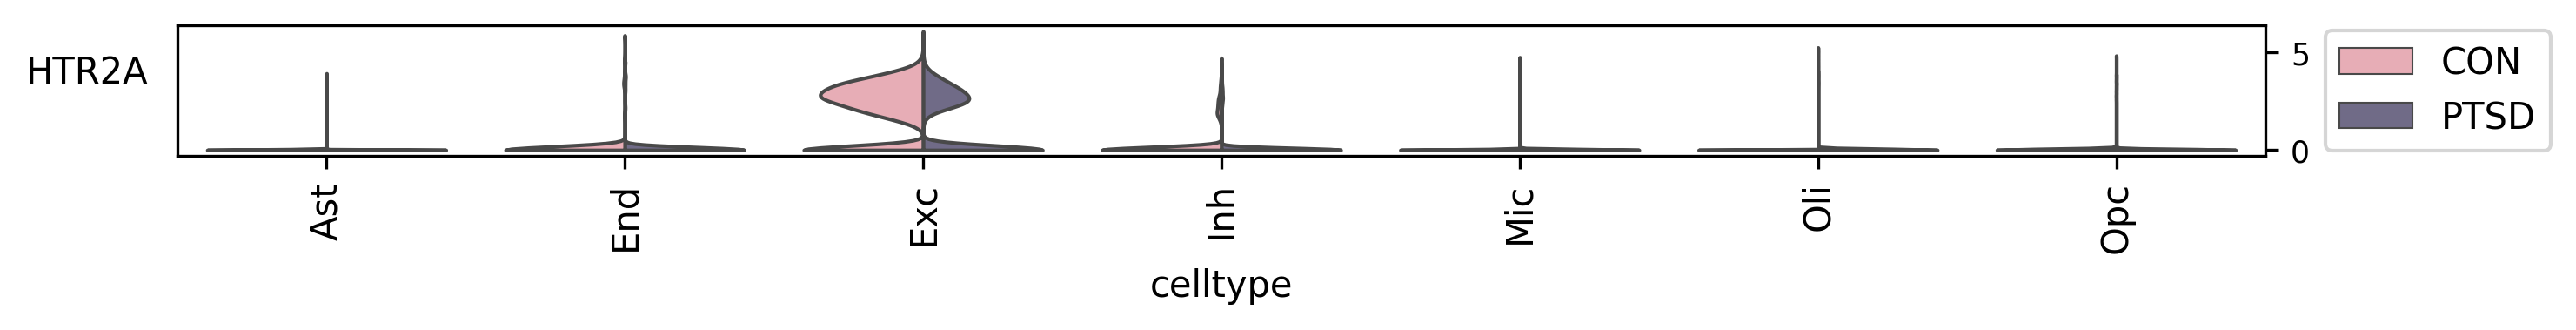

DCDC2
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
617  DCDC2  9.424218e-148   -0.376504  0.108  0.267  1.373391e-143


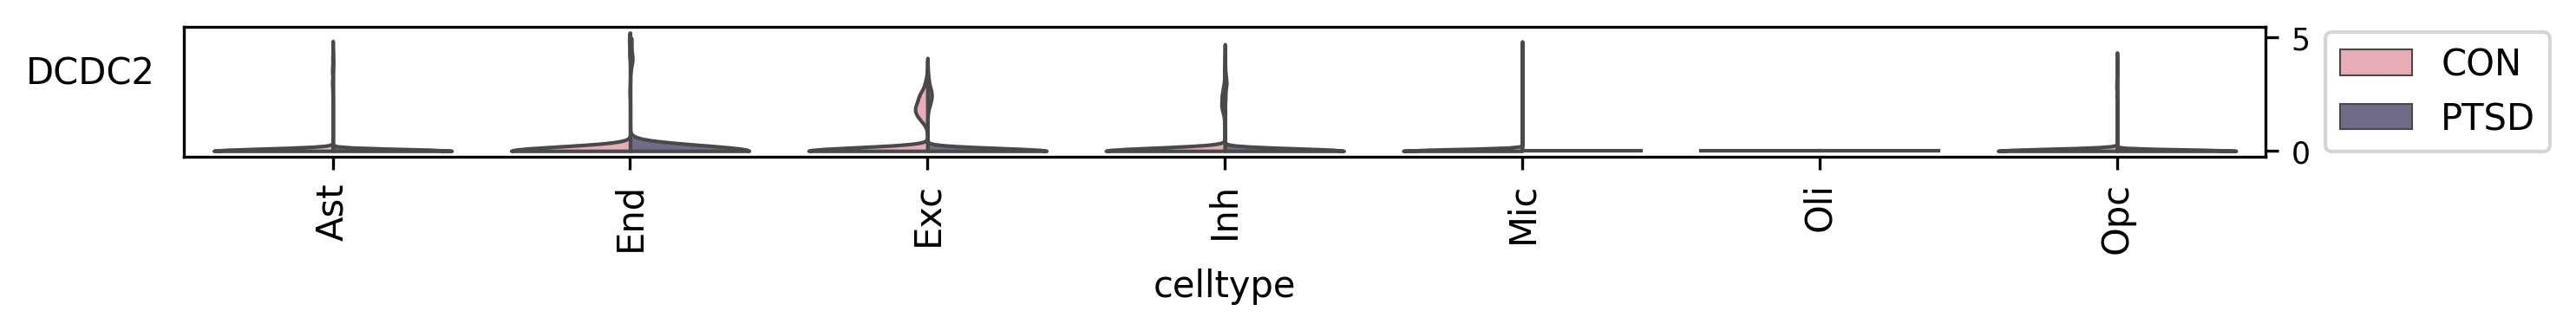

GFRA2
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
361  GFRA2  4.543075e-184   -0.367083  0.276  0.551  6.620624e-180


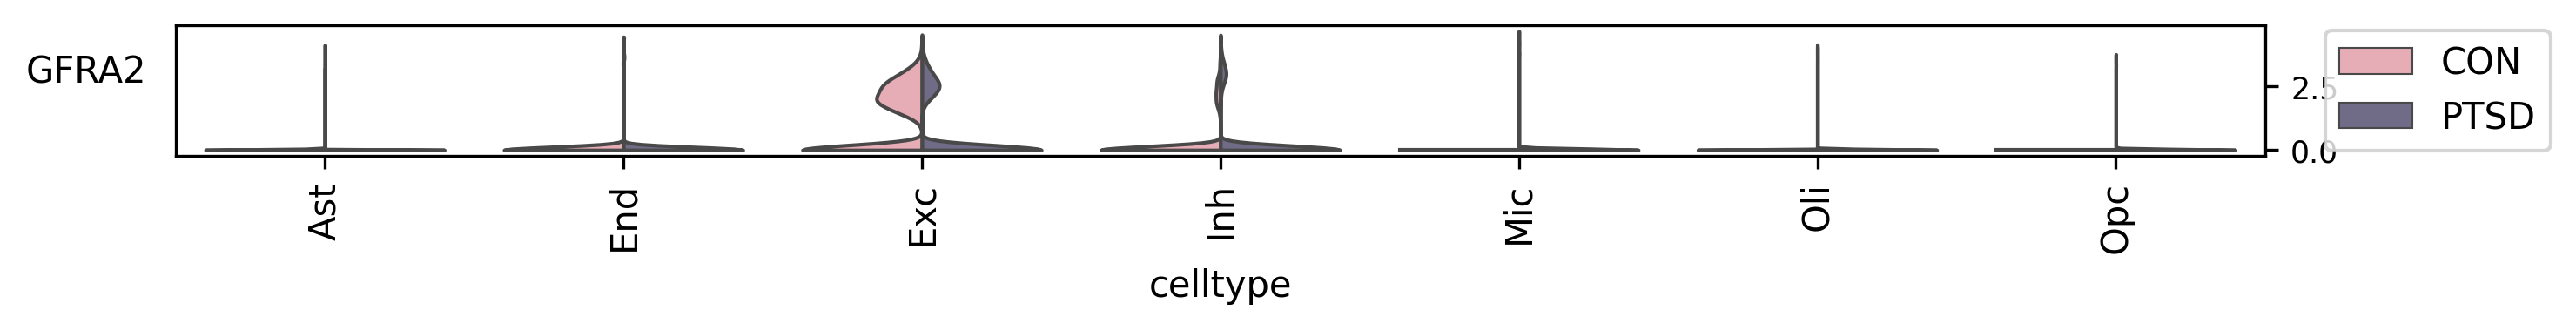

IPCEF1
      gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
33  IPCEF1    0.0   -0.770893  0.463  0.822        0.0


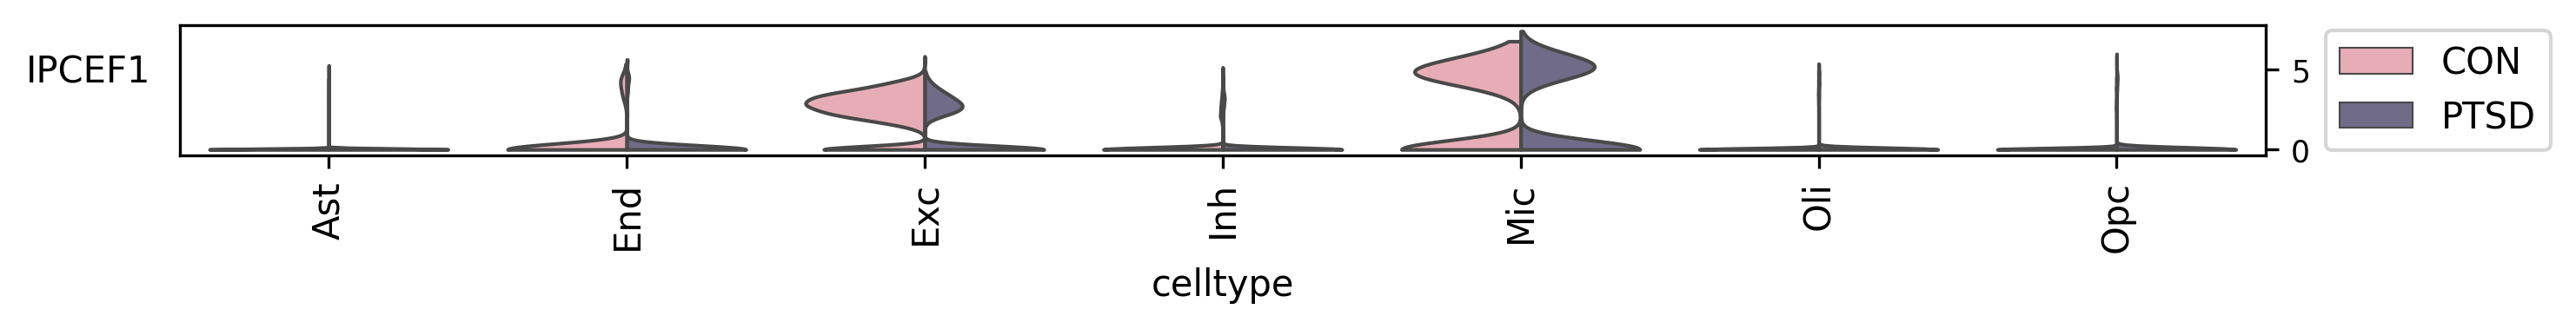

PDE10A
      gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
34  PDE10A    0.0   -1.038915  0.855  0.967        0.0


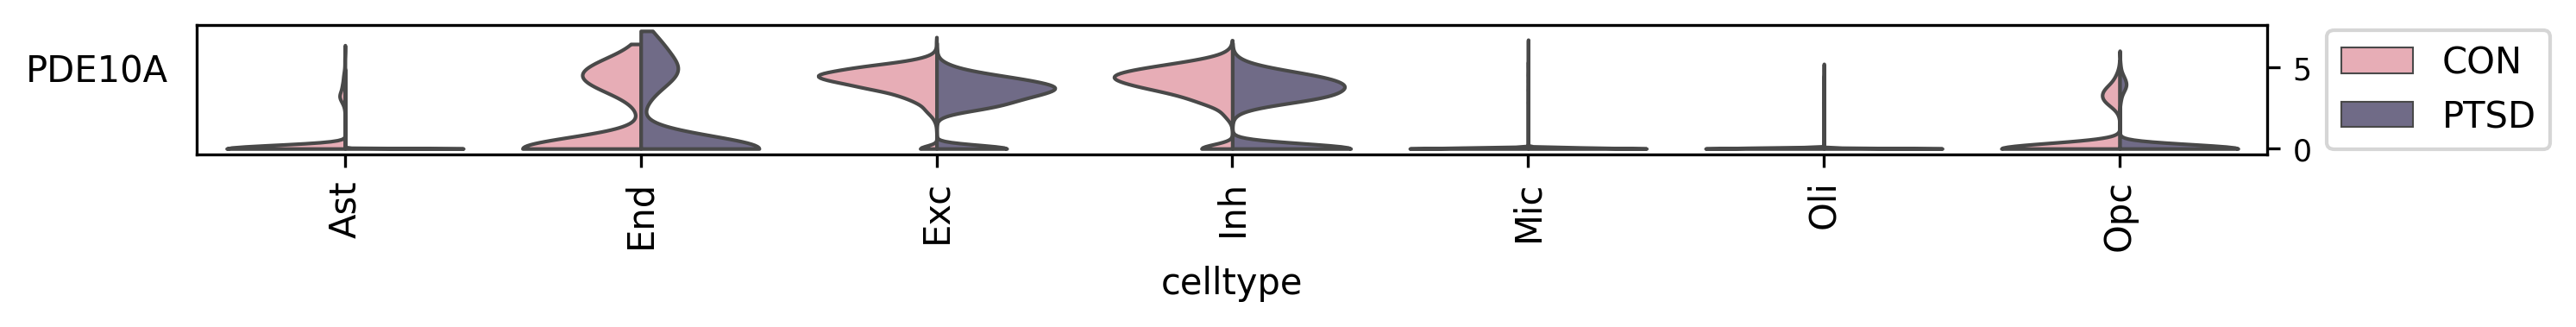

AMER2
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
127  AMER2  9.518529e-255    -0.45417  0.126  0.367  1.387135e-250


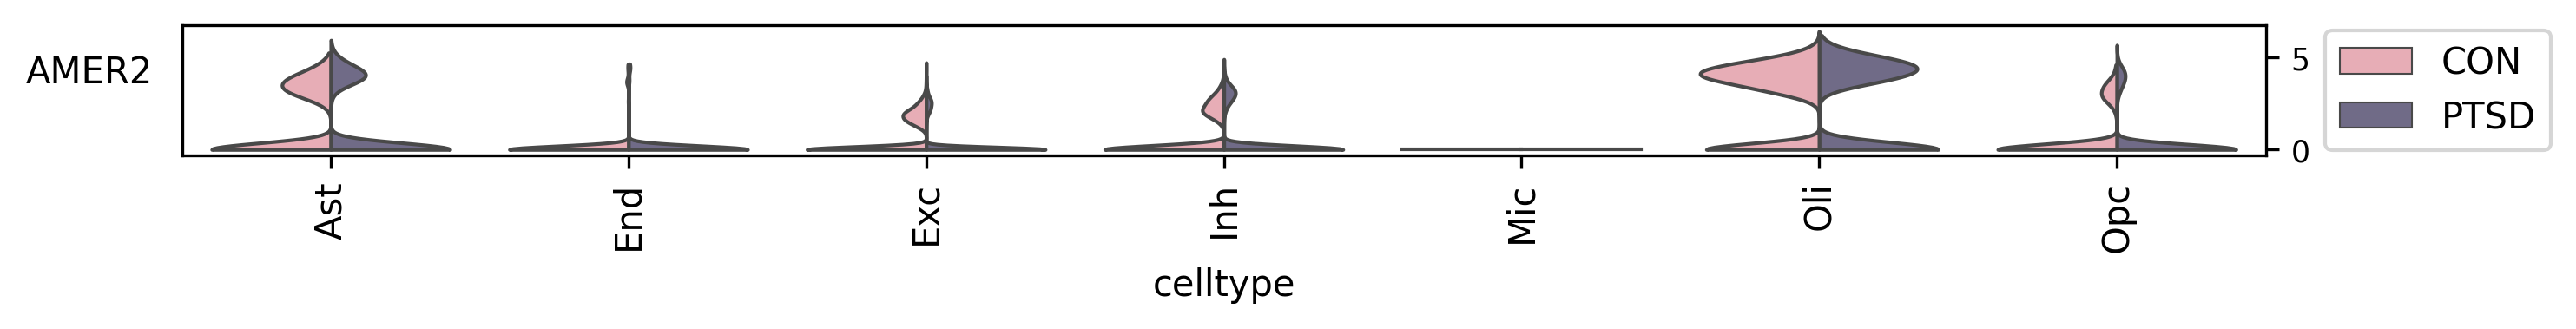

FAM13C
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
907  FAM13C  3.675452e-108   -0.279987  0.476  0.736  5.356237e-104


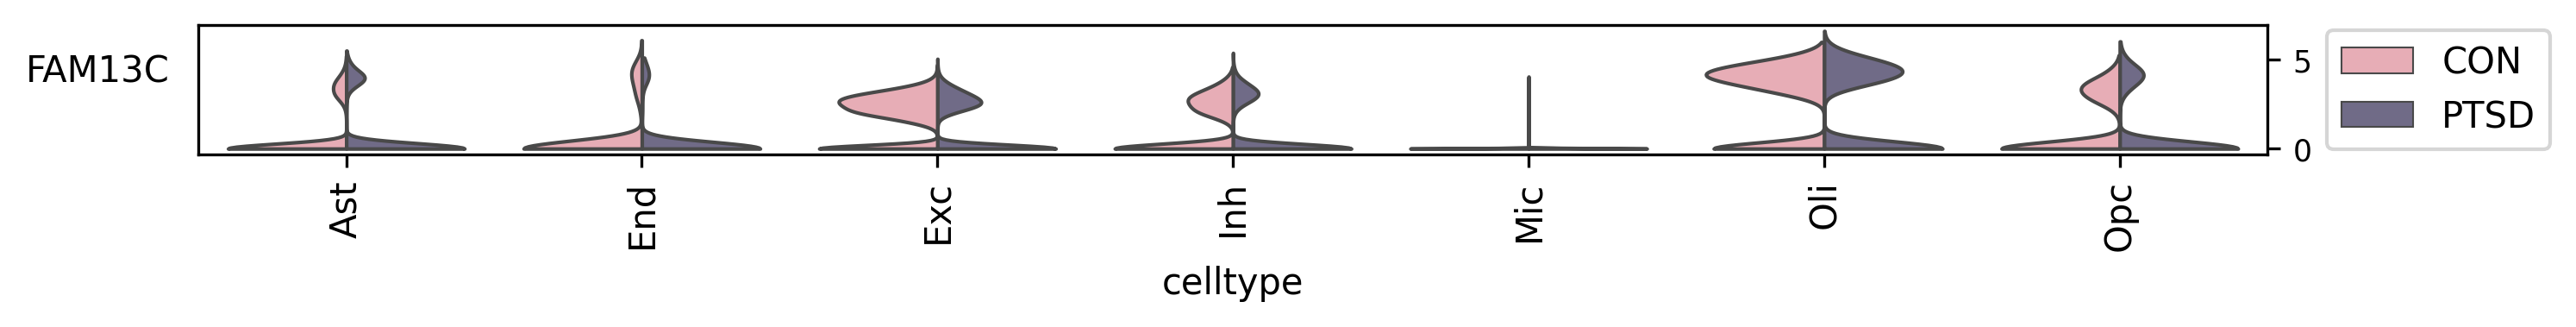

RASSF5
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
534  RASSF5  5.564088e-158    -0.29857  0.146   0.34  8.108546e-154


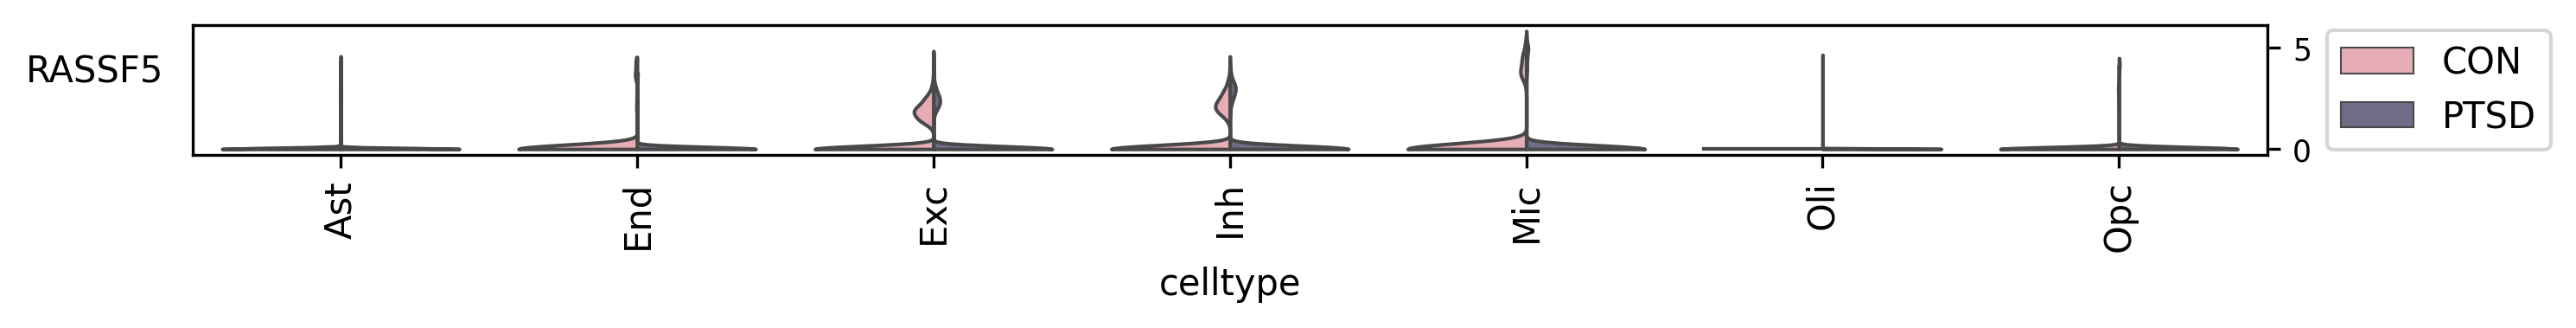

GNG2
     gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
983  GNG2  2.359955e-97   -0.286843  0.345  0.561  3.439163e-93


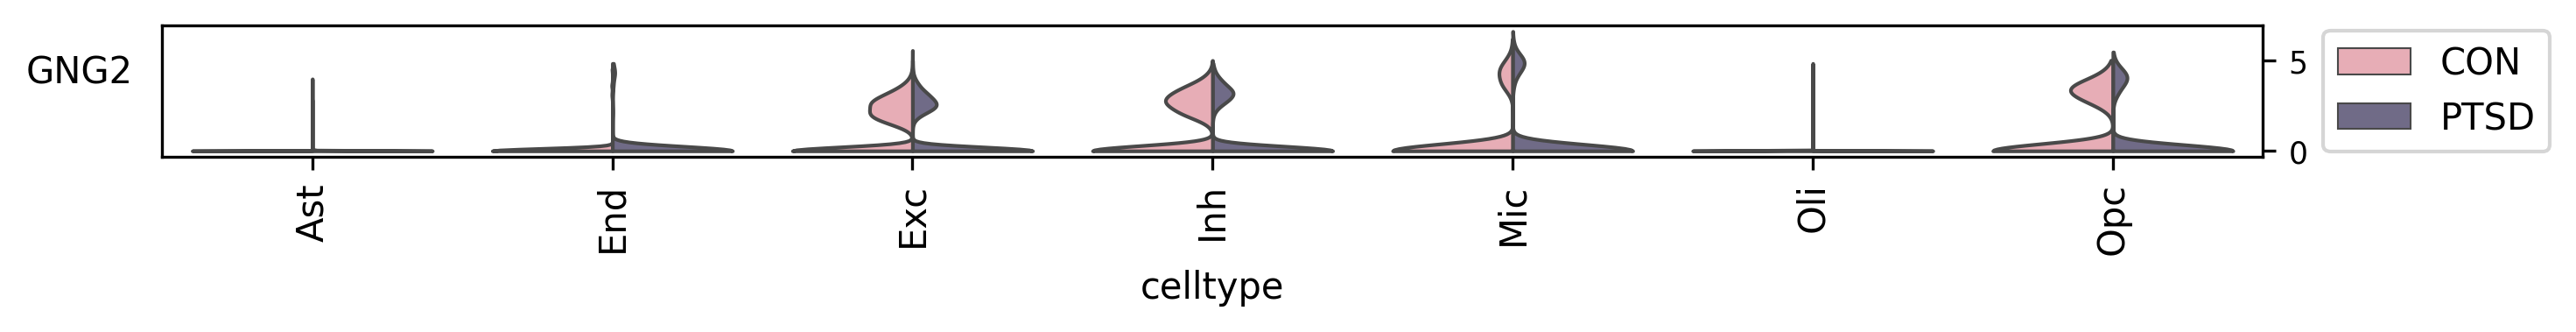

CATSPERB
         gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
875  CATSPERB  1.783746e-113   -0.276121  0.063  0.173  2.599453e-109


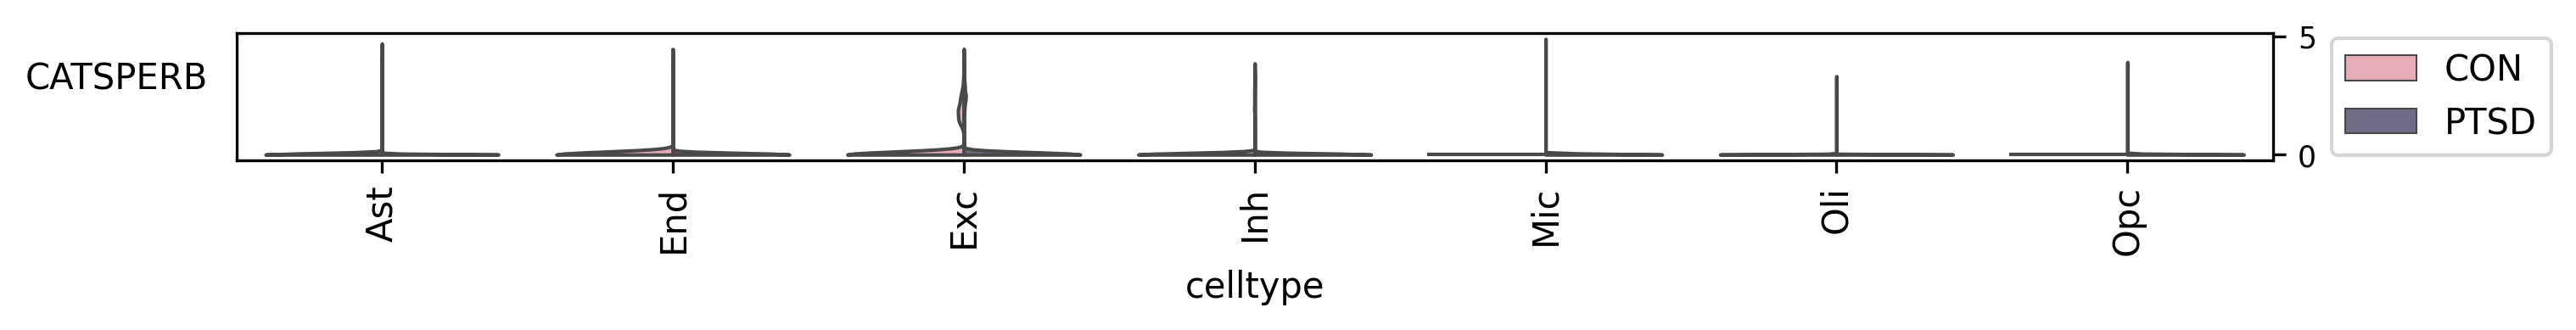

RHBDD2
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
508  RHBDD2  1.580694e-162   -0.276102  0.252  0.516  2.303545e-158


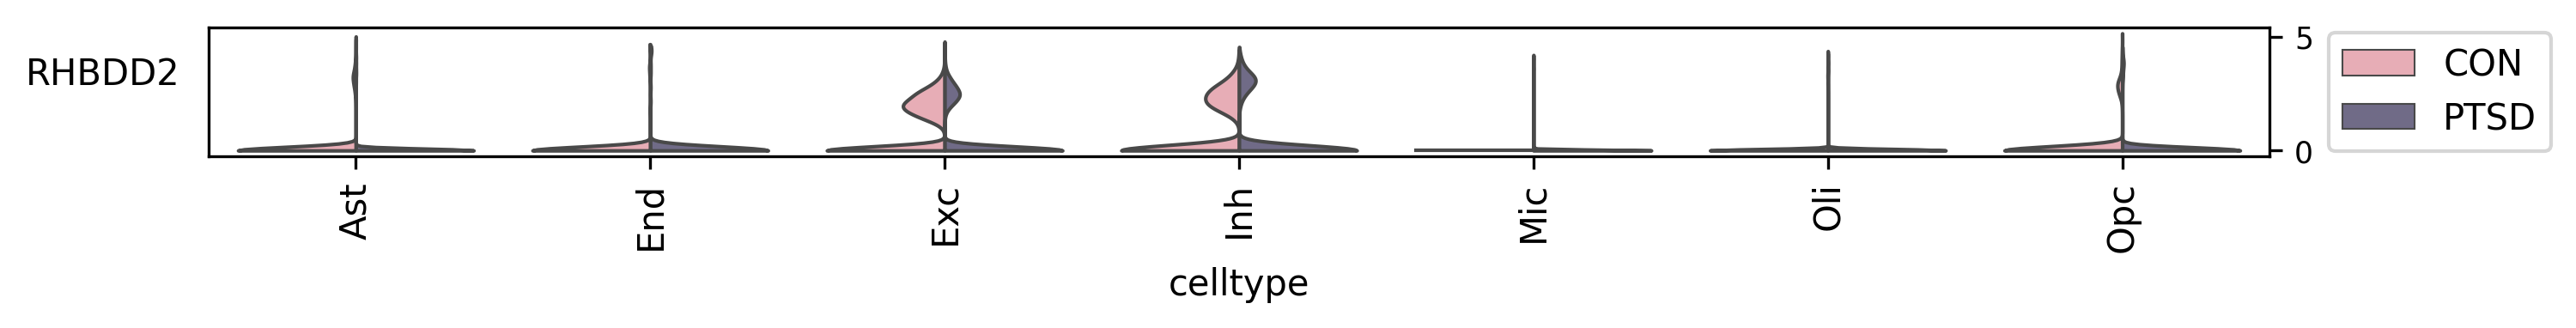

STAMBPL1
         gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
161  STAMBPL1  4.119514e-233   -0.486595  0.419  0.755  6.003368e-229


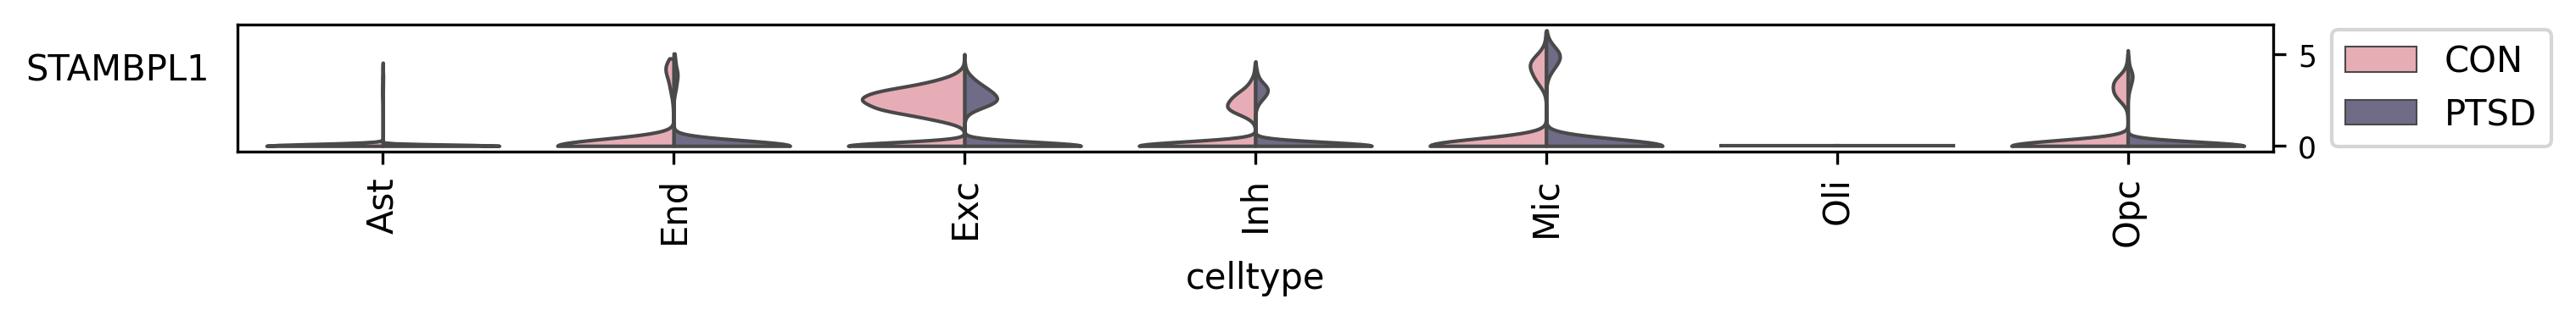

NAP1L5
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
220  NAP1L5  4.346307e-215   -0.556275  0.099  0.289  6.333873e-211


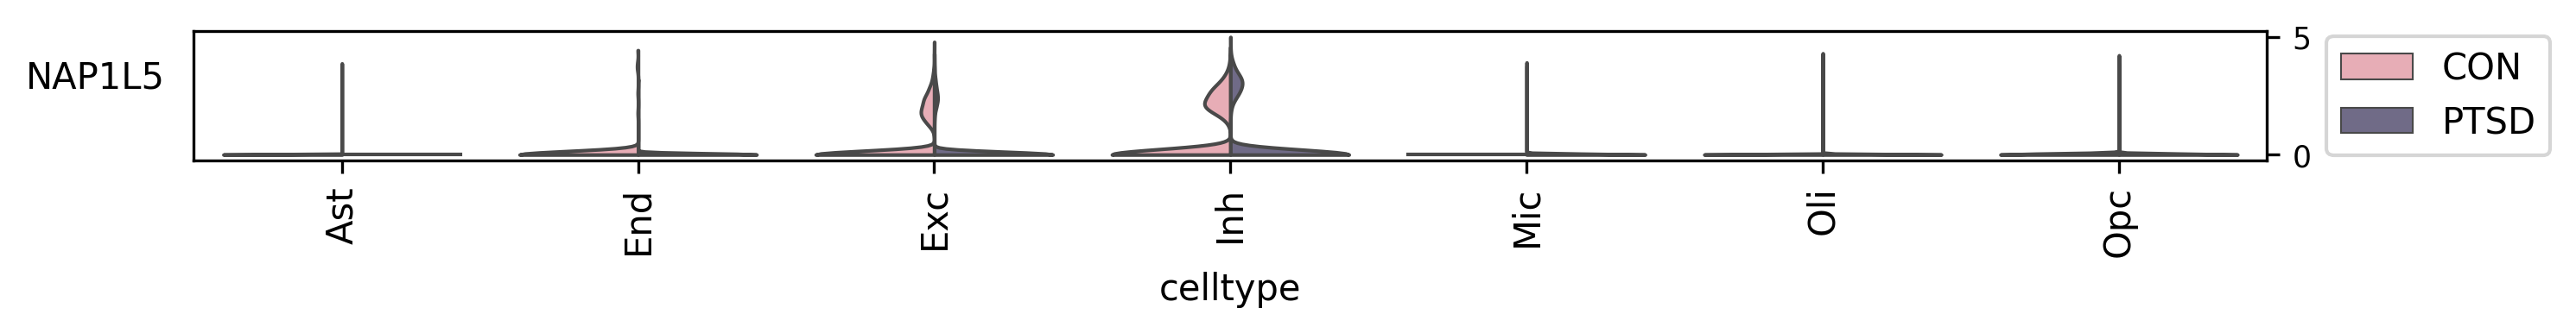

GLIS1
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
555  GLIS1  4.059914e-155   -0.321414  0.359  0.646  5.916512e-151


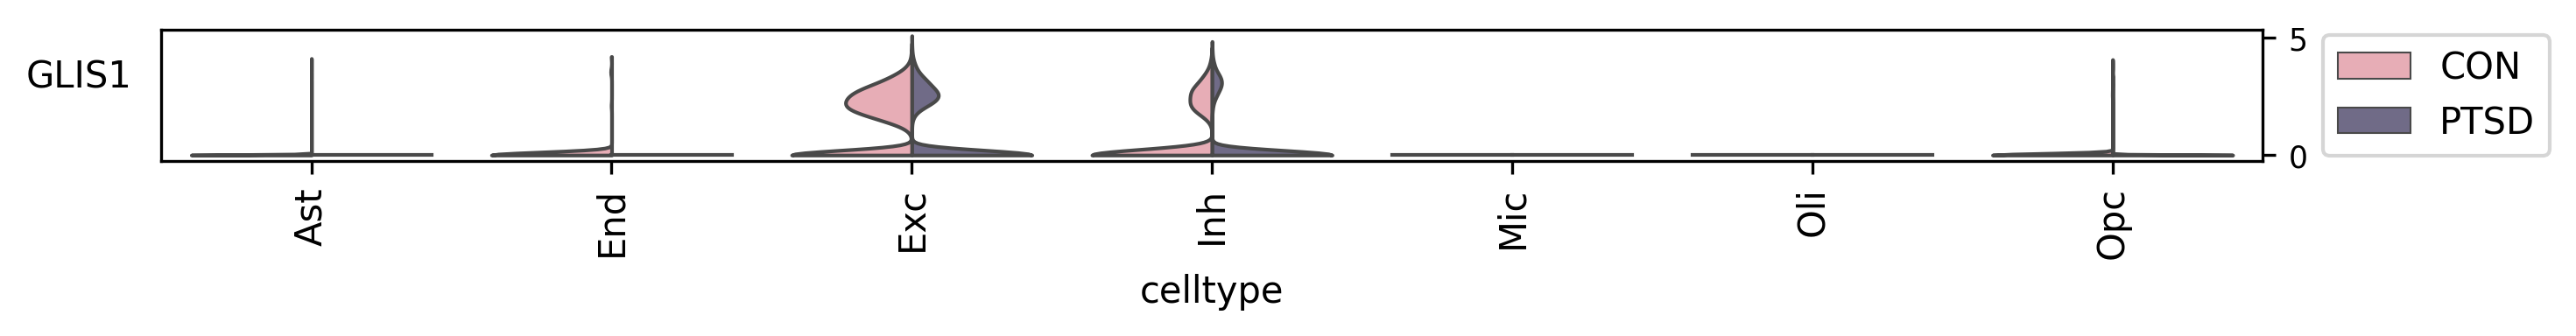

ZDHHC2
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
216  ZDHHC2  8.490975e-216   -0.421994  0.233   0.51  1.237390e-211


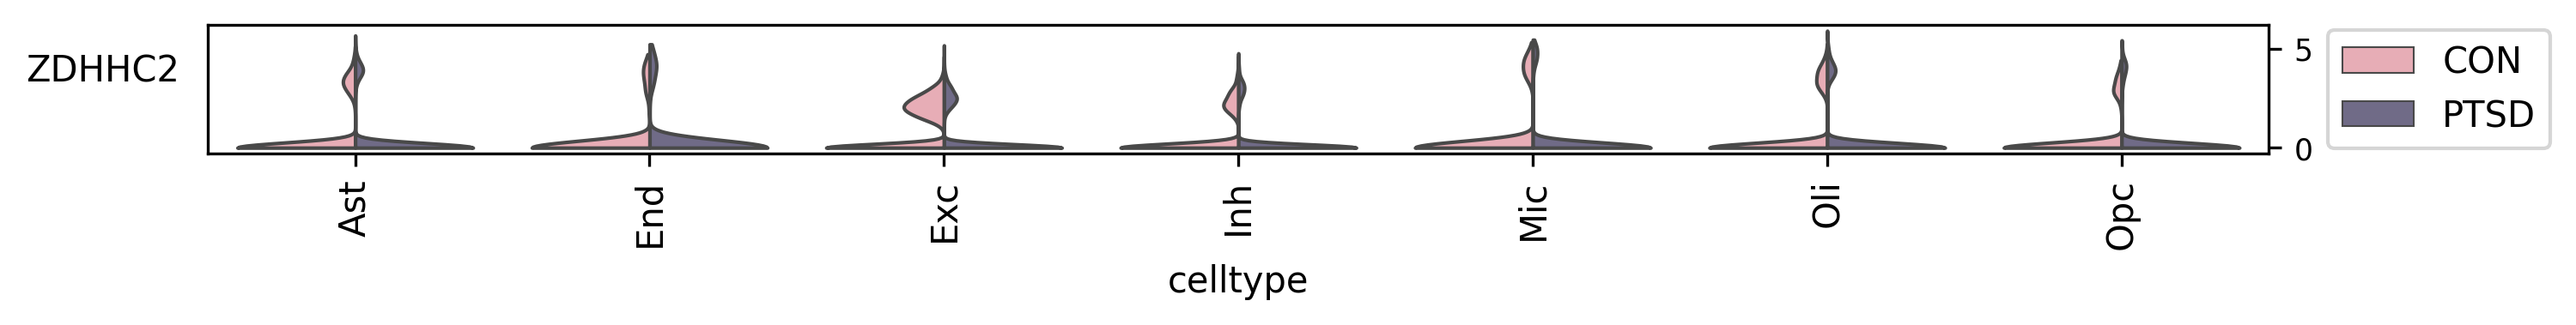

FLRT3
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
457  FLRT3  5.395625e-169   -0.318482  0.155  0.362  7.863045e-165


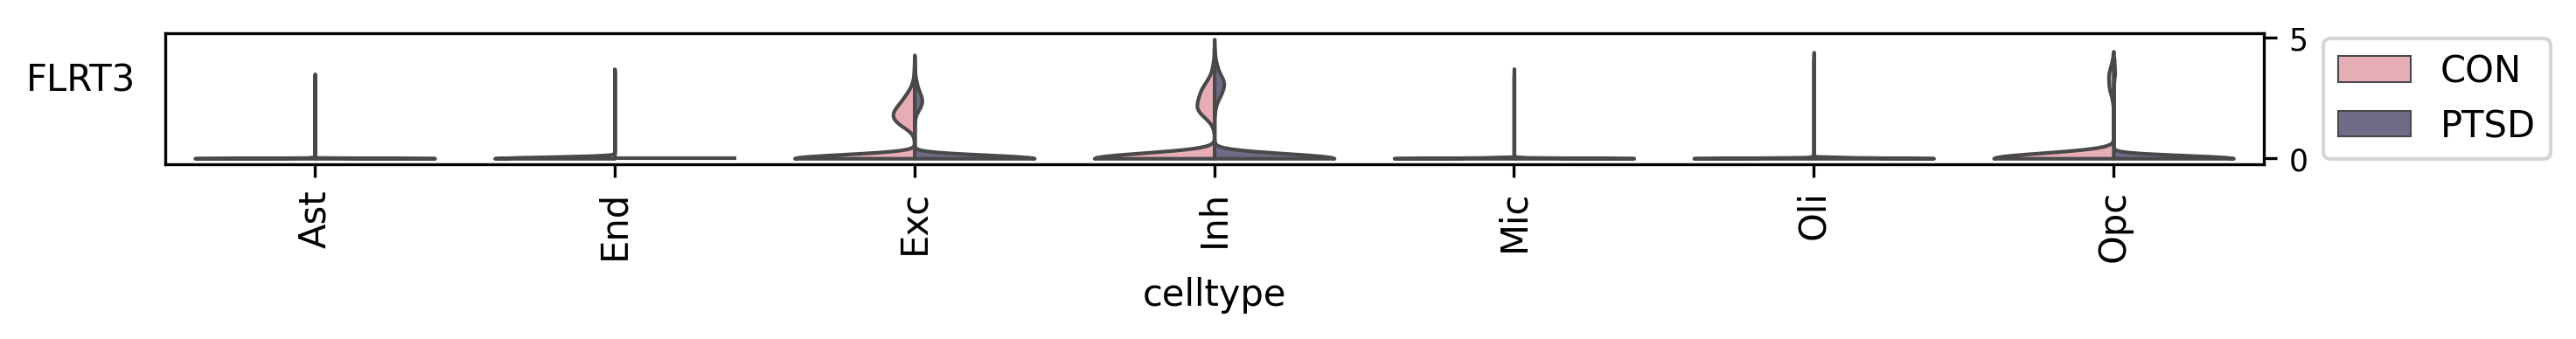

SLC24A2
        gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
153  SLC24A2  1.272968e-236   -0.595525  0.832  0.958  1.855096e-232


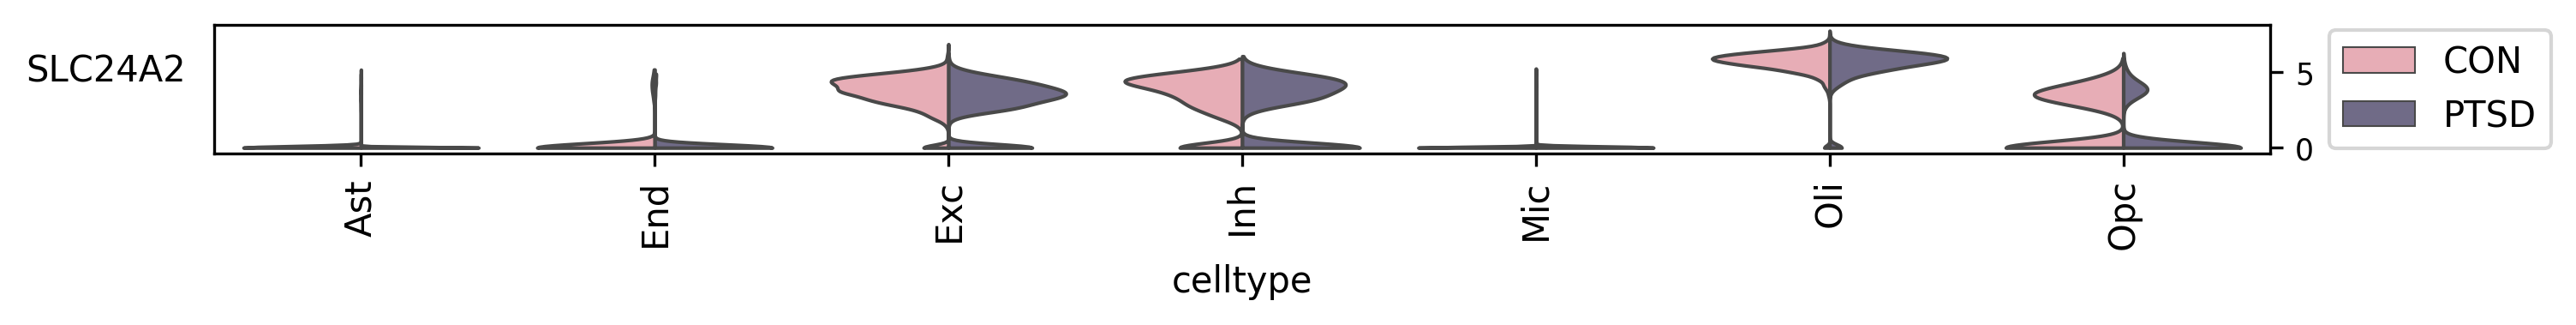

FRMD6
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
477  FRMD6  1.164689e-166   -0.502609  0.312  0.563  1.697301e-162


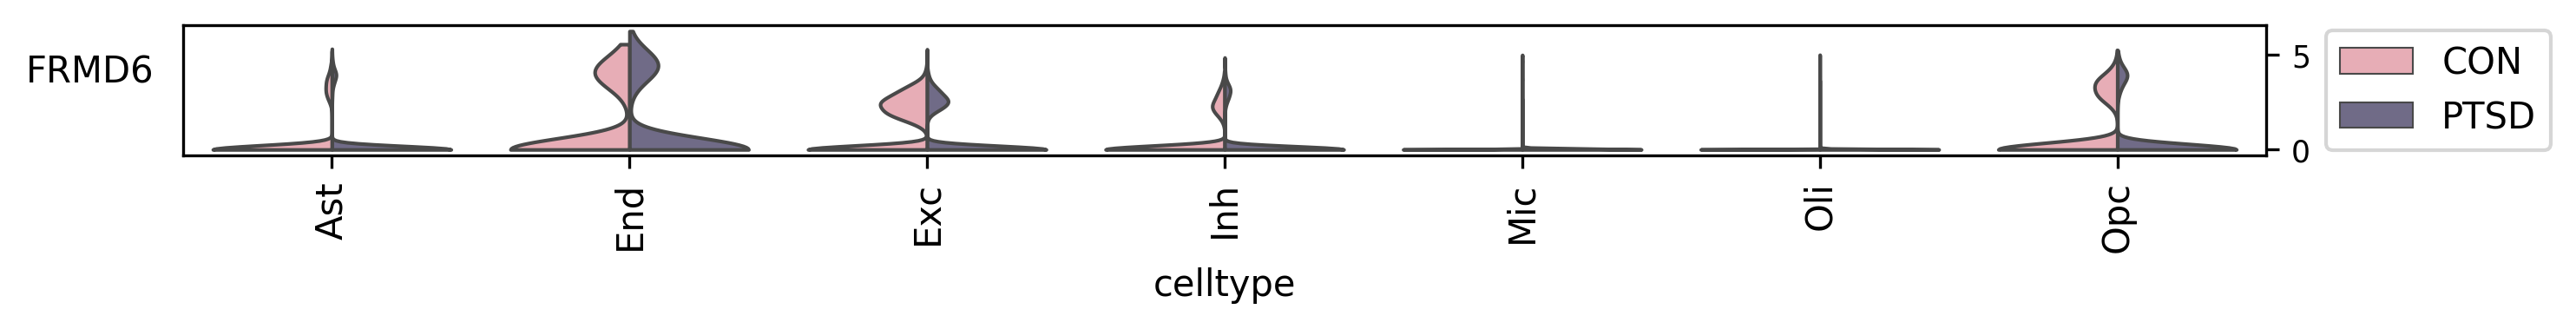

ITGA8
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
1046  ITGA8  1.087422e-83    -0.96827  0.058  0.142  1.584700e-79


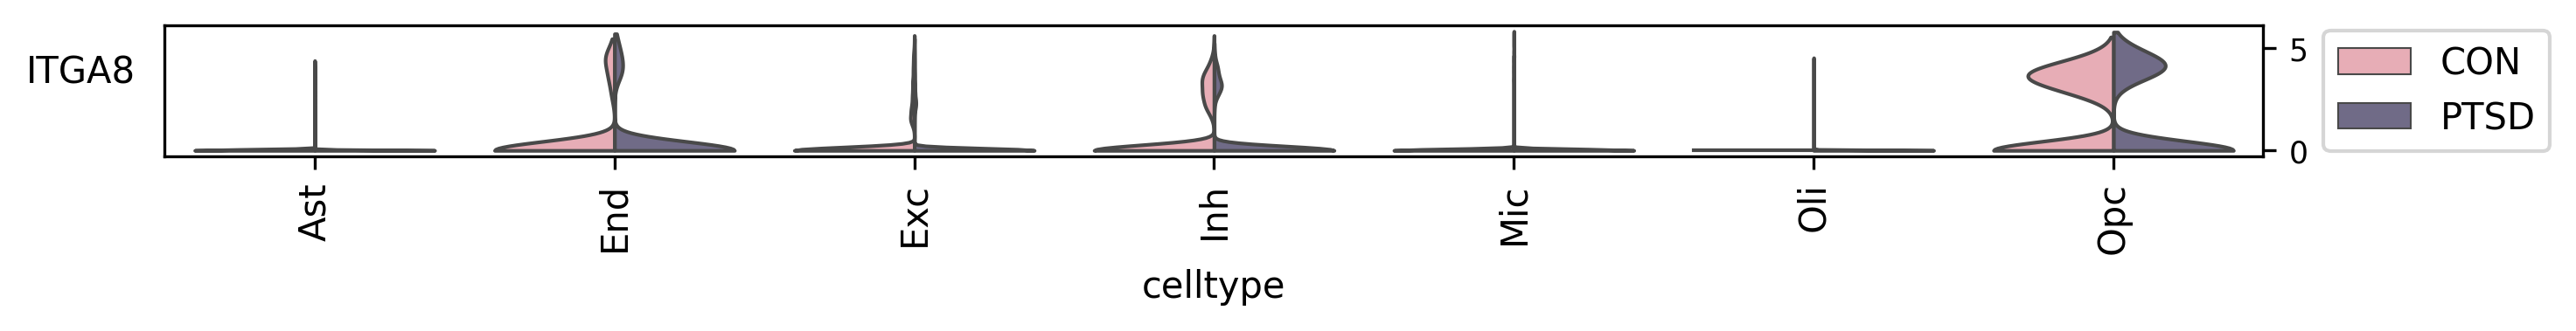

IFIT5
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
845  IFIT5  4.069064e-119   -0.321416   0.02  0.096  5.929846e-115


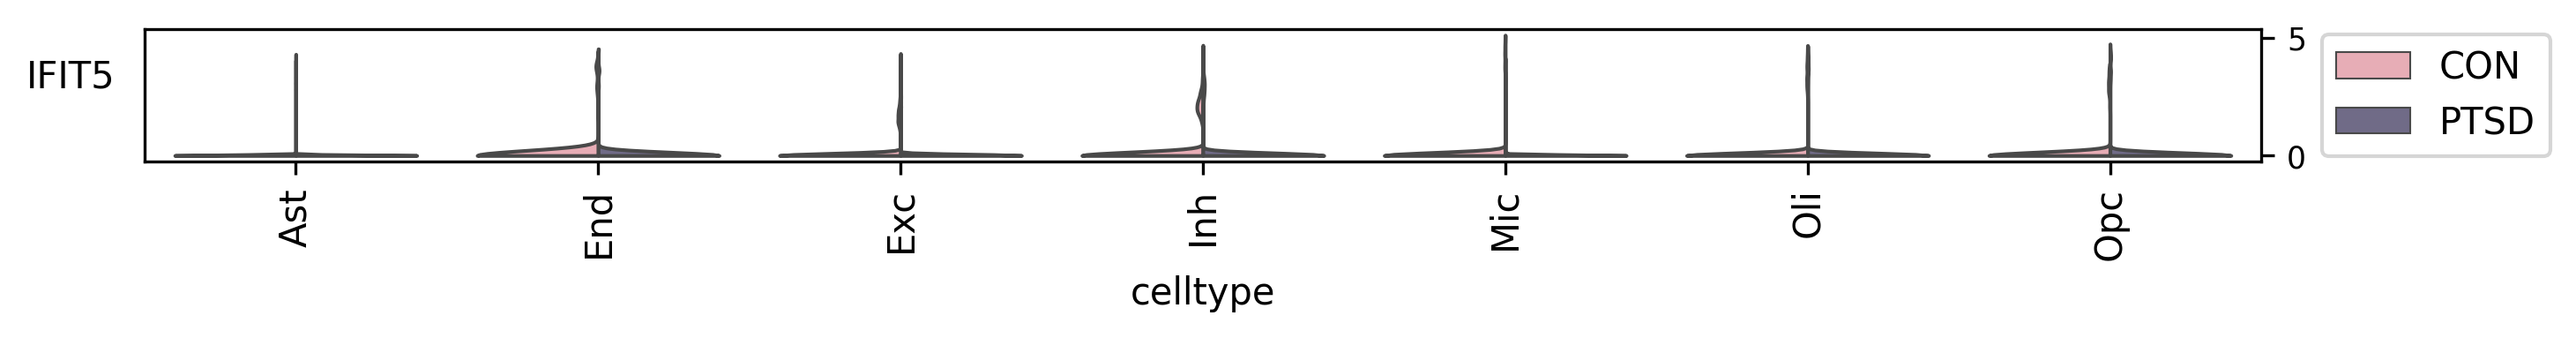

LRP8
     gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
313  LRP8  1.253828e-191   -0.370538  0.199  0.446  1.827204e-187


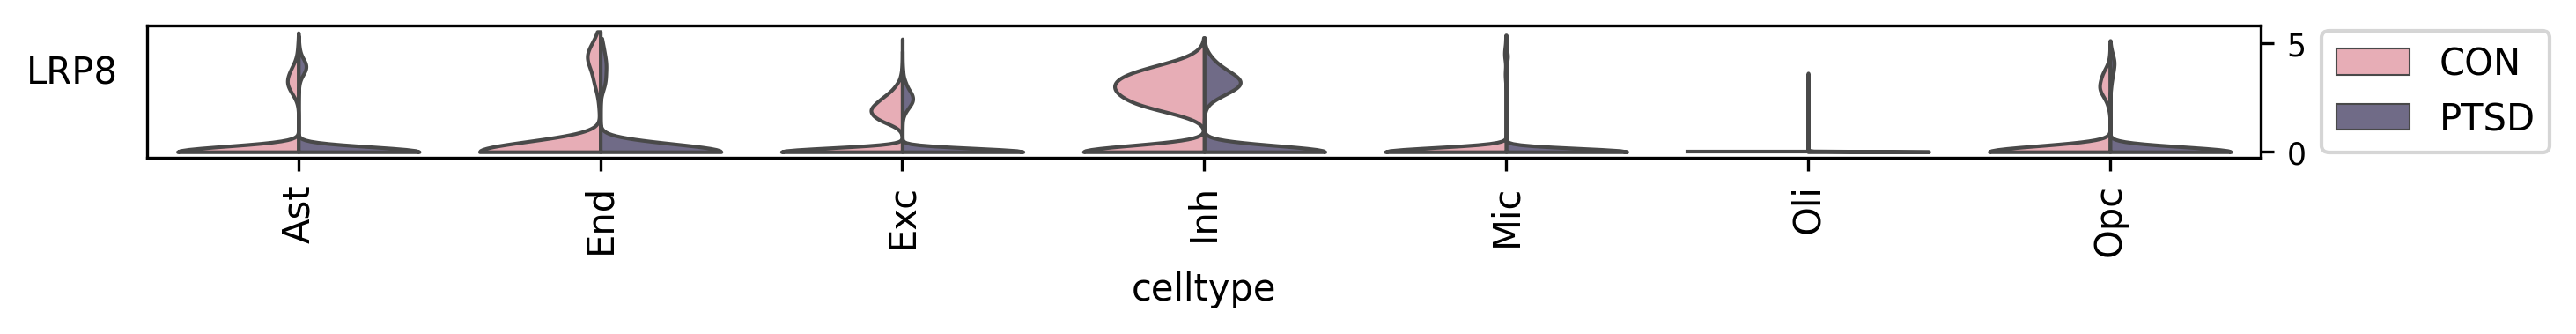

KIAA0319
        gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
26  KIAA0319    0.0   -0.671471  0.508  0.825        0.0


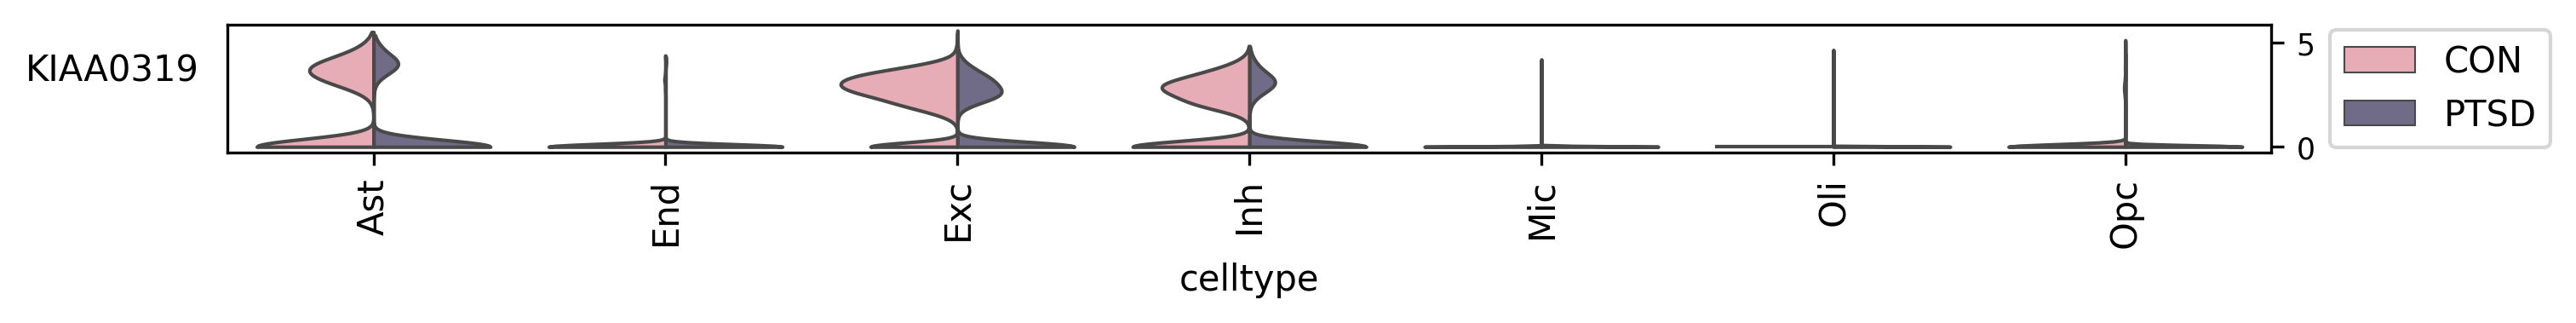

HIPK1
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
496  HIPK1  4.617786e-163   -0.297488  0.249   0.51  6.729499e-159


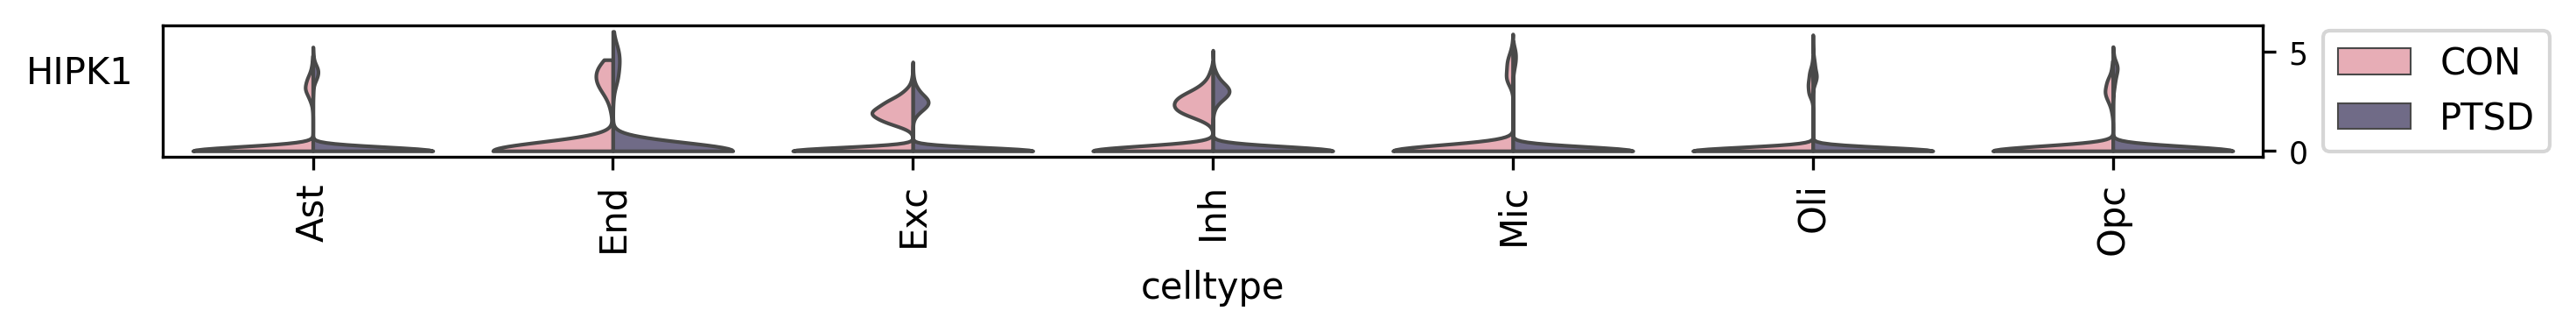

KCND3
      gene          p_val  avg_log2FC  pct.1  pct.2     p_val_adj
953  KCND3  2.298579e-101   -0.303485  0.757  0.924  3.349719e-97


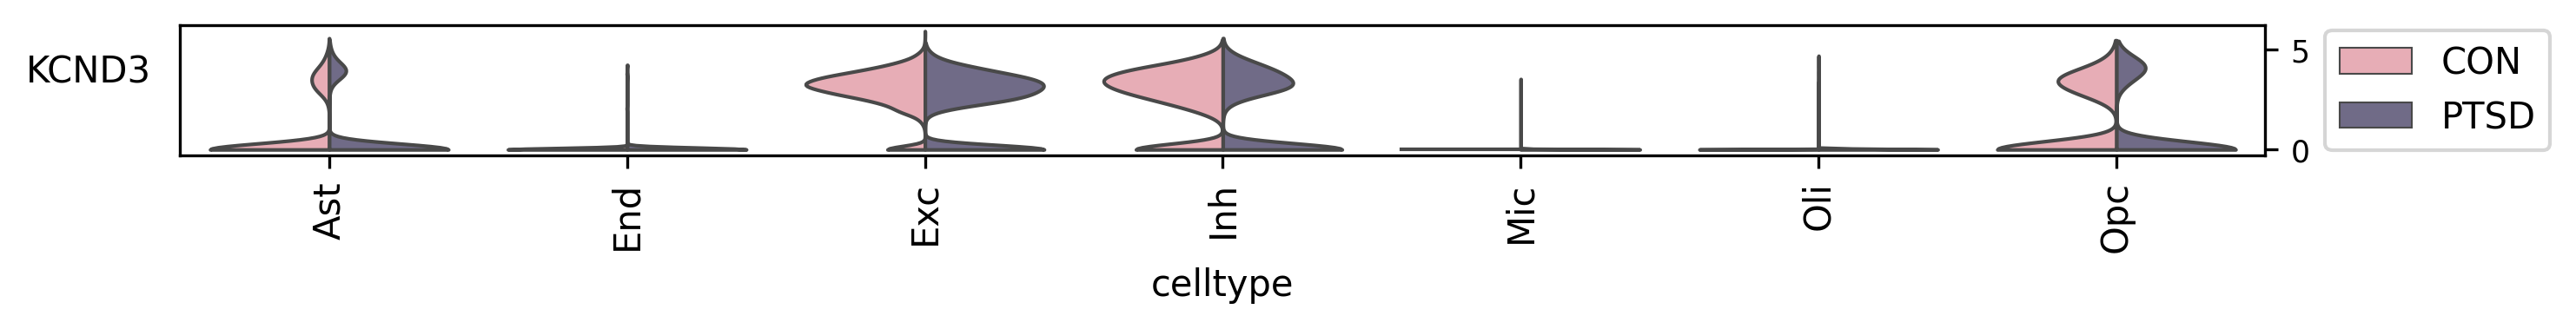

RAB31
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
879  RAB31  7.798442e-113   -0.264687  0.081  0.202  1.136467e-108


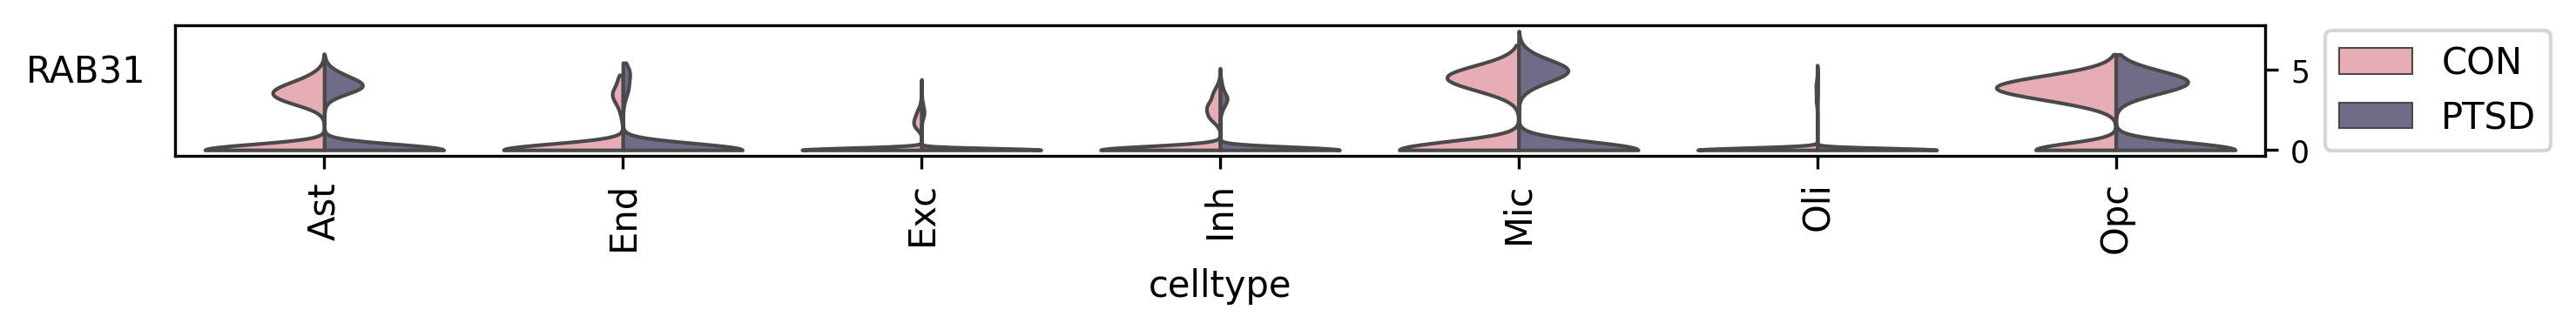

OPRM1
     gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
32  OPRM1    0.0   -0.733039  0.309  0.666        0.0


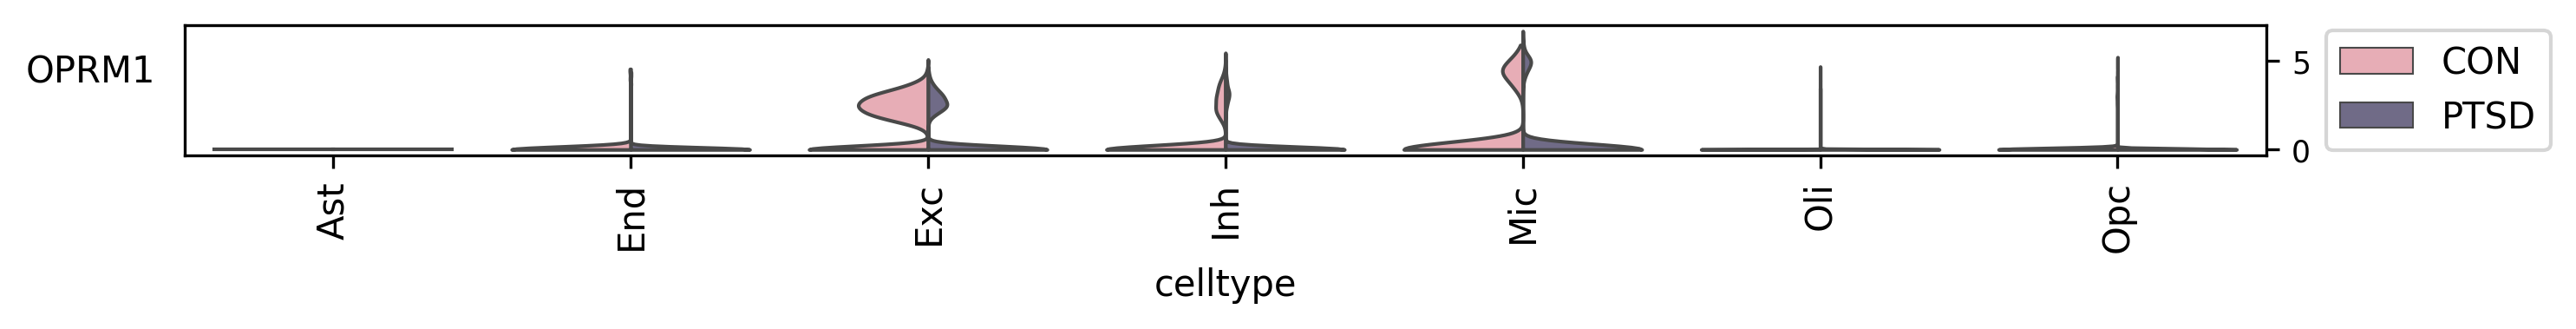

RNLS
     gene          p_val  avg_log2FC  pct.1  pct.2     p_val_adj
940  RNLS  1.614270e-103   -0.269874  0.357   0.59  2.352476e-99


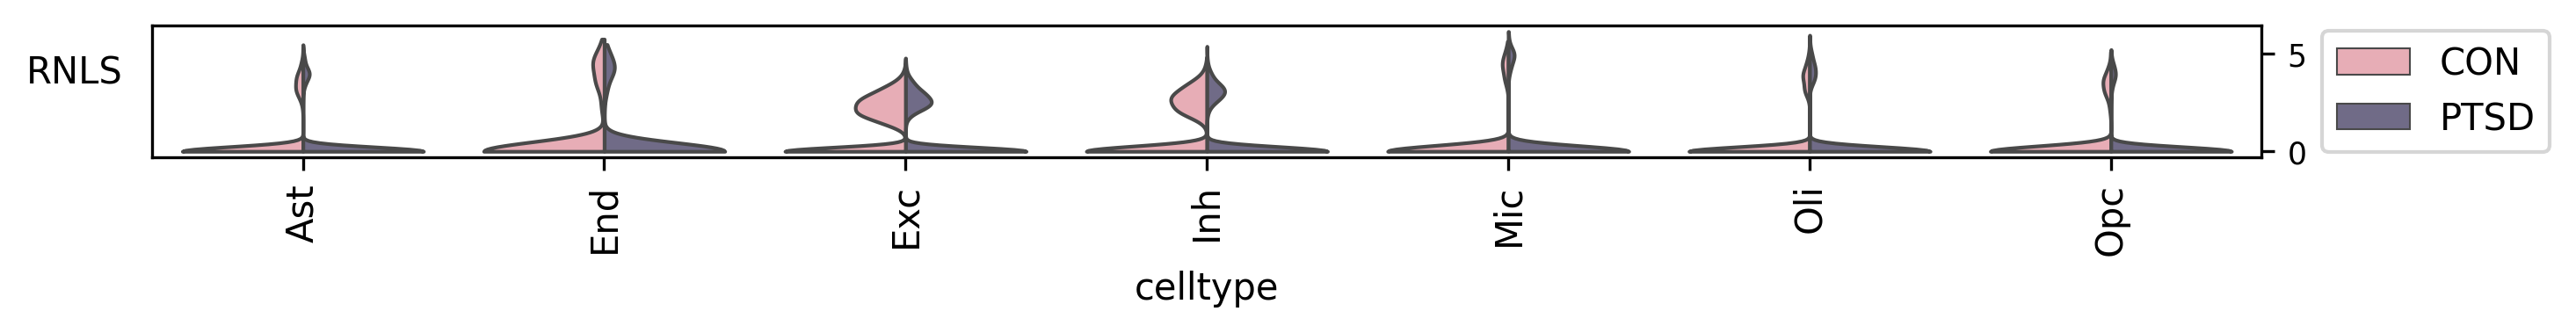

RALYL
     gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
41  RALYL    0.0   -0.490728  0.996  0.997        0.0


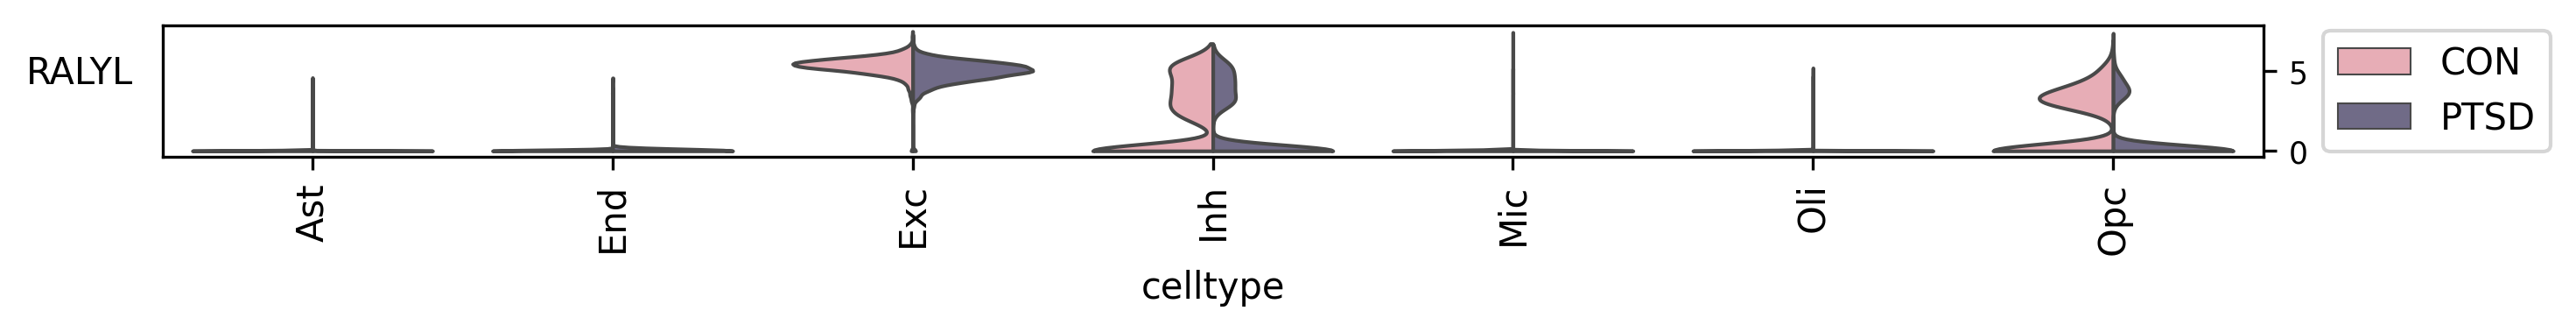

ADO
    gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
712  ADO  4.584652e-138   -0.303363   0.07  0.201  6.681214e-134


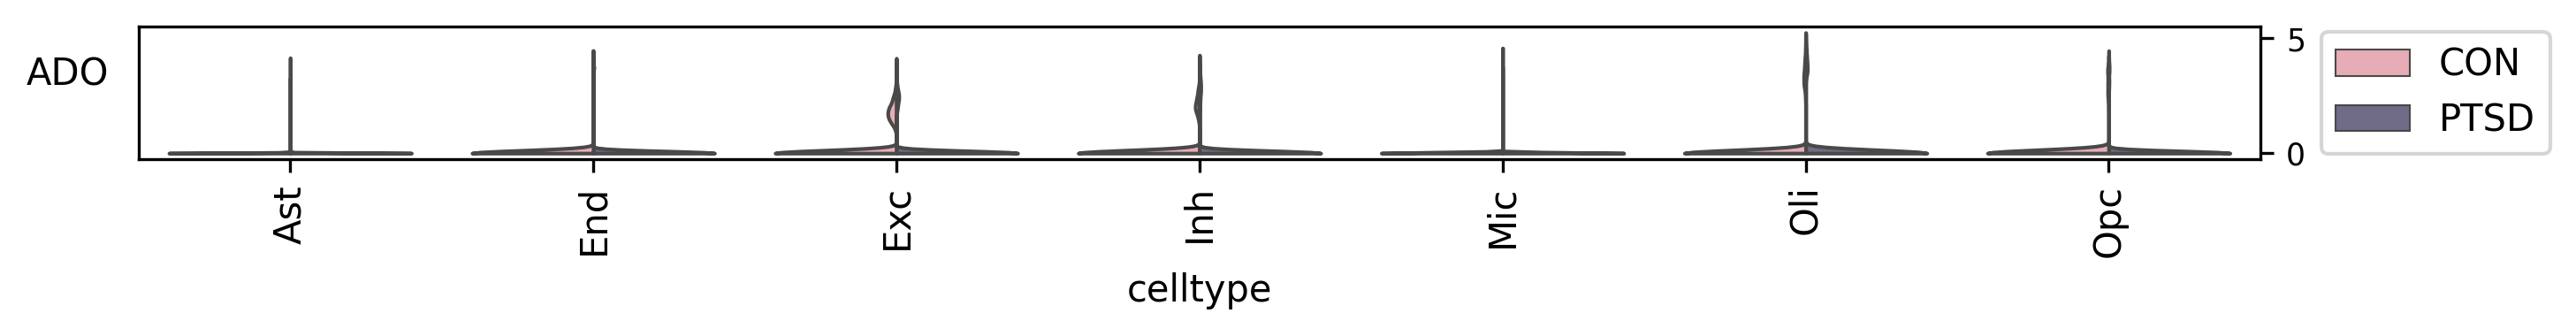

NMNAT2
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
221  NMNAT2  4.867238e-215   -0.371656  0.839  0.954  7.093025e-211


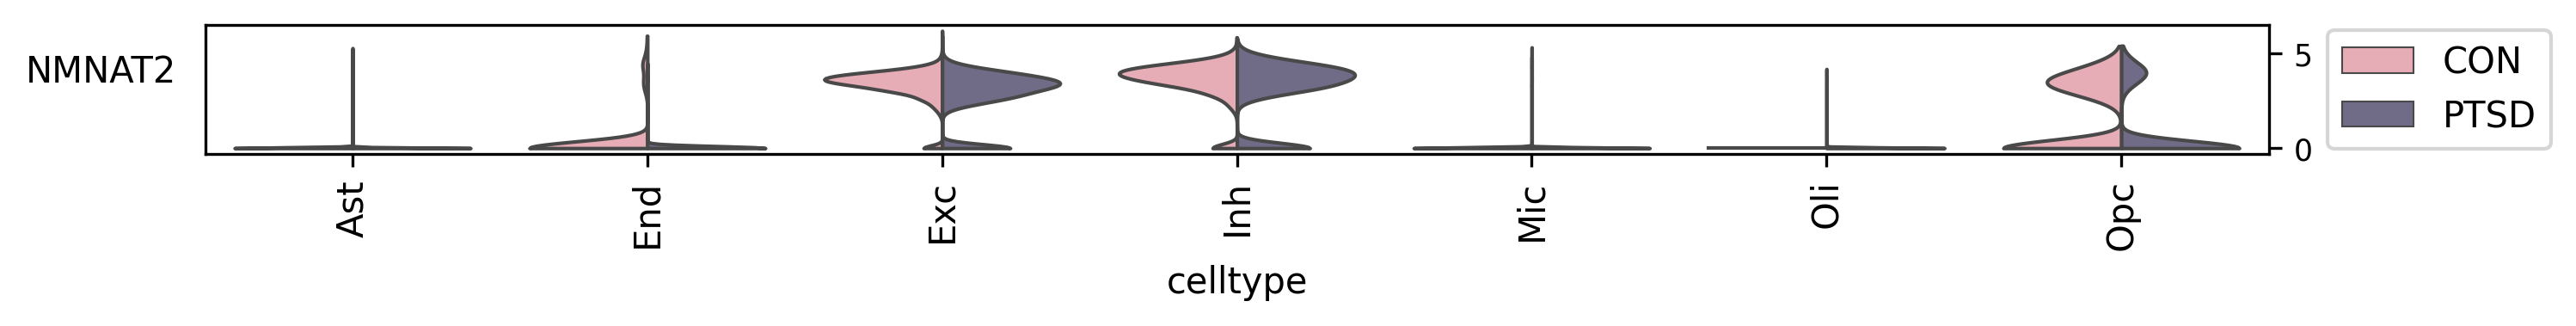

SRGAP2
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
335  SRGAP2  1.364455e-187   -0.381655  0.355  0.665  1.988420e-183


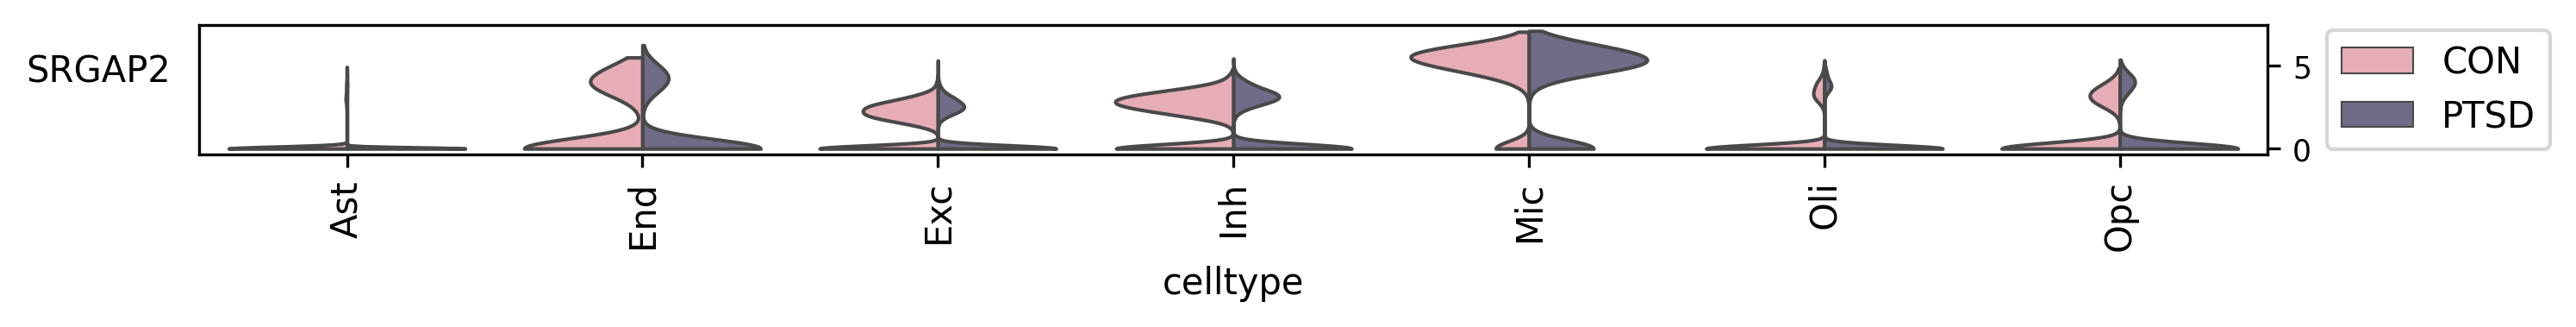

GSKIP
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
574  GSKIP  9.032683e-153   -0.271909  0.144  0.336  1.316333e-148


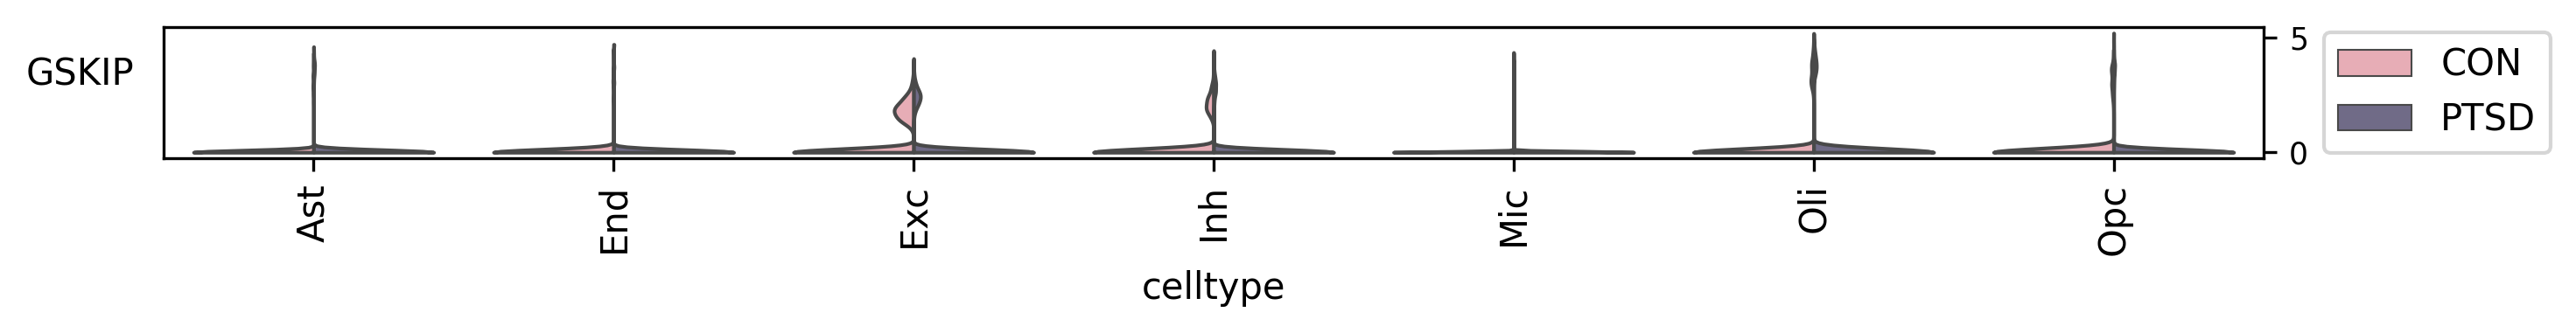

LRCH1
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
196  LRCH1  9.522251e-222   -0.504204  0.359  0.672  1.387678e-217


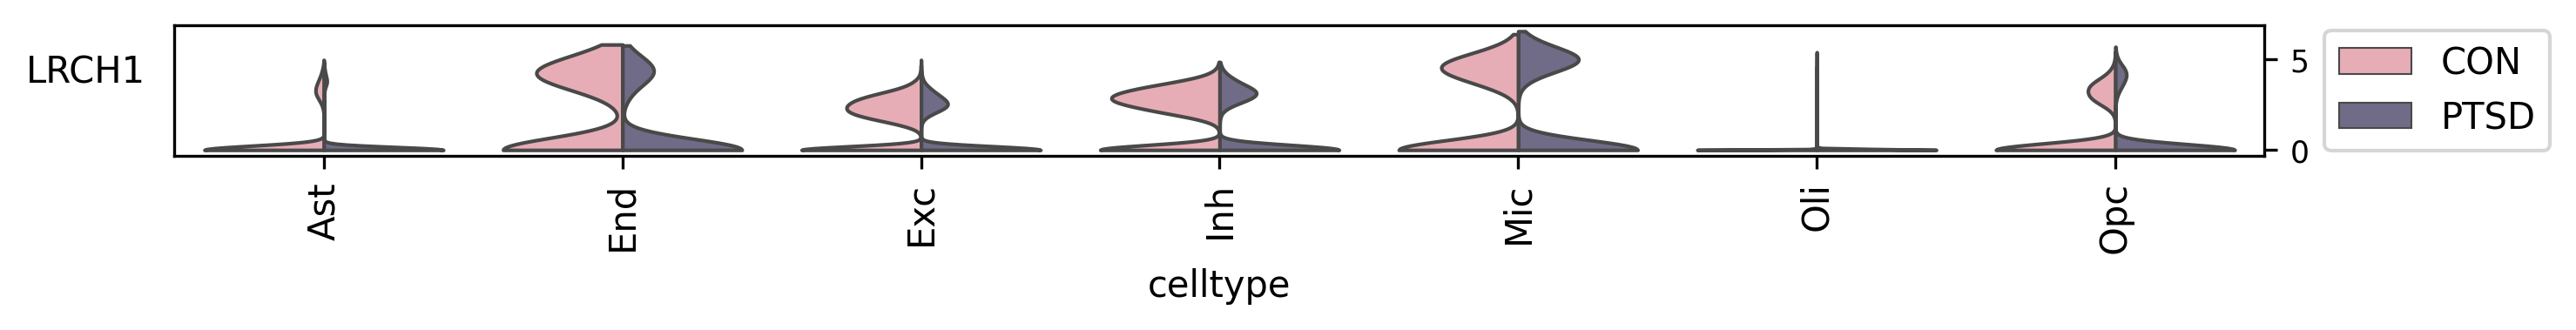

RTN1
     gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
175  RTN1  4.098393e-228   -0.336309  0.967  0.993  5.972588e-224


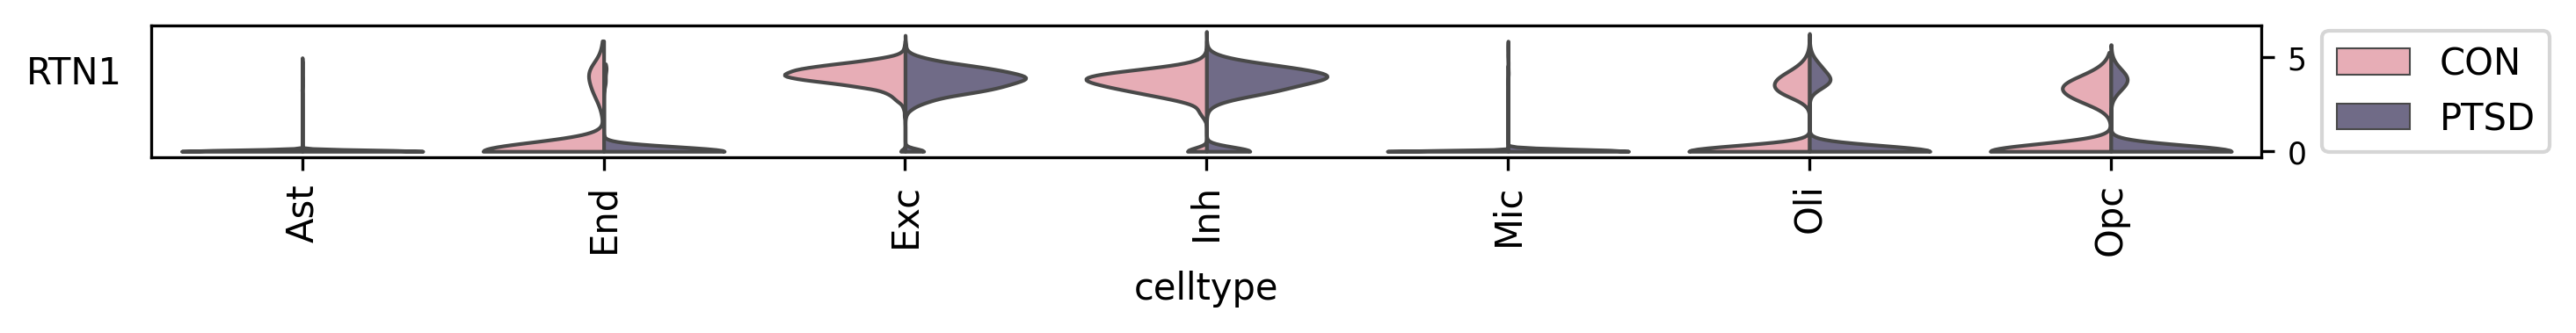

NEUROD6
       gene  p_val  avg_log2FC  pct.1  pct.2  p_val_adj
36  NEUROD6    0.0   -0.833603  0.126    0.4        0.0


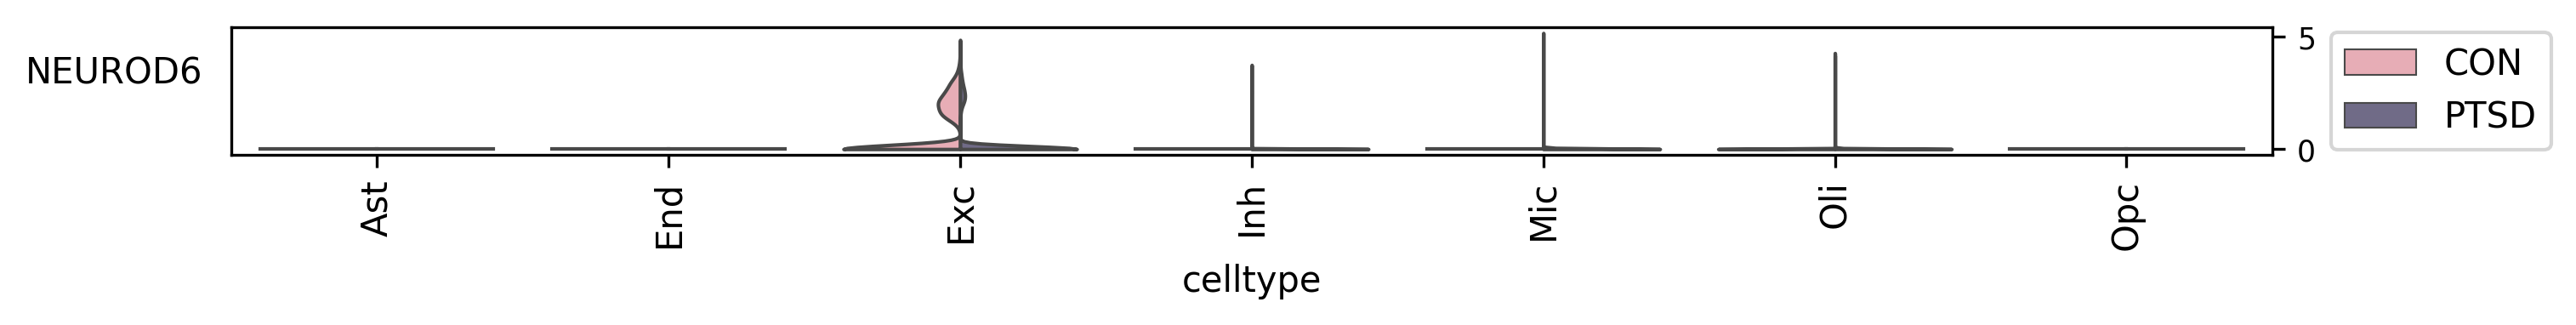

ARSJ
     gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
808  ARSJ  1.475886e-125    -0.69689  0.075  0.194  2.150809e-121


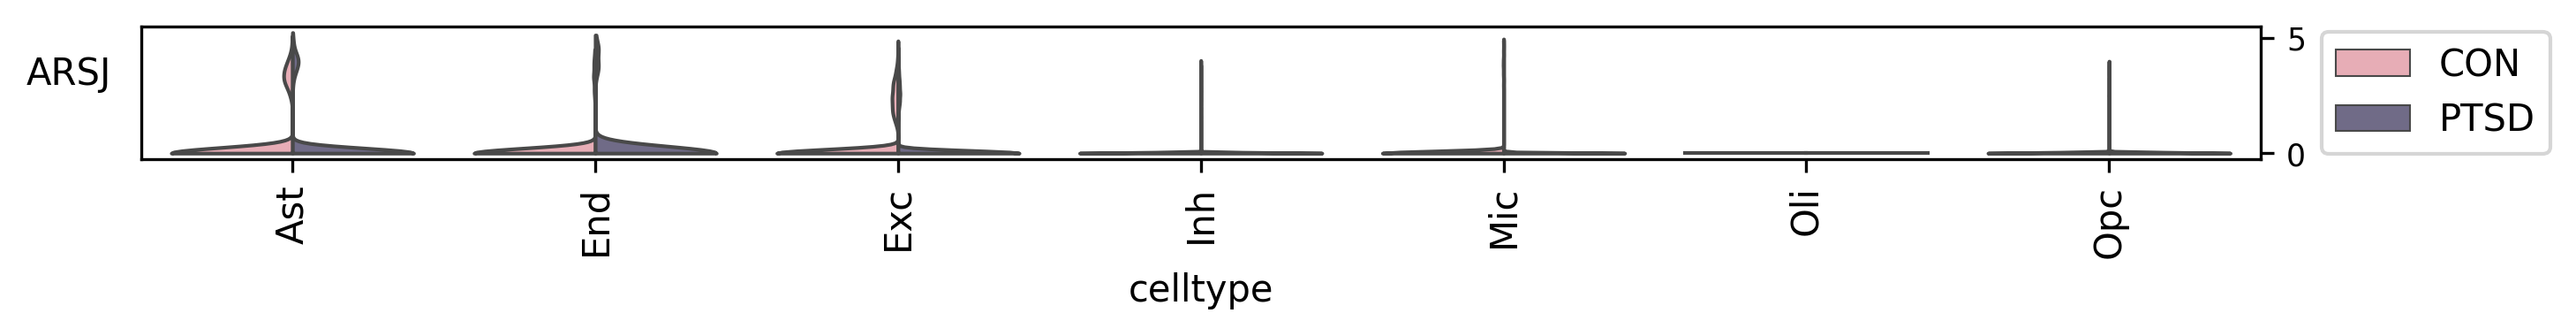

KLHL5
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
1043  KLHL5  5.600096e-84   -0.367769  0.184   0.32  8.161020e-80


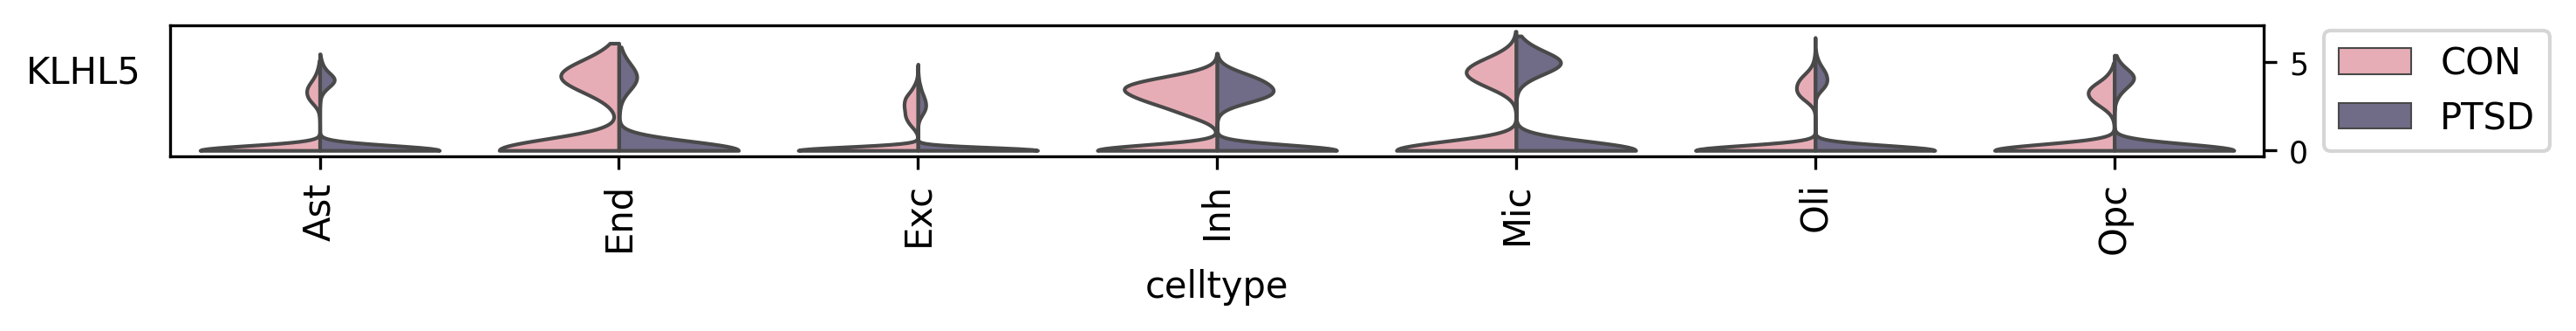

CAMK2D
       gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
214  CAMK2D  8.288252e-217   -0.683516  0.555  0.797  1.207847e-212


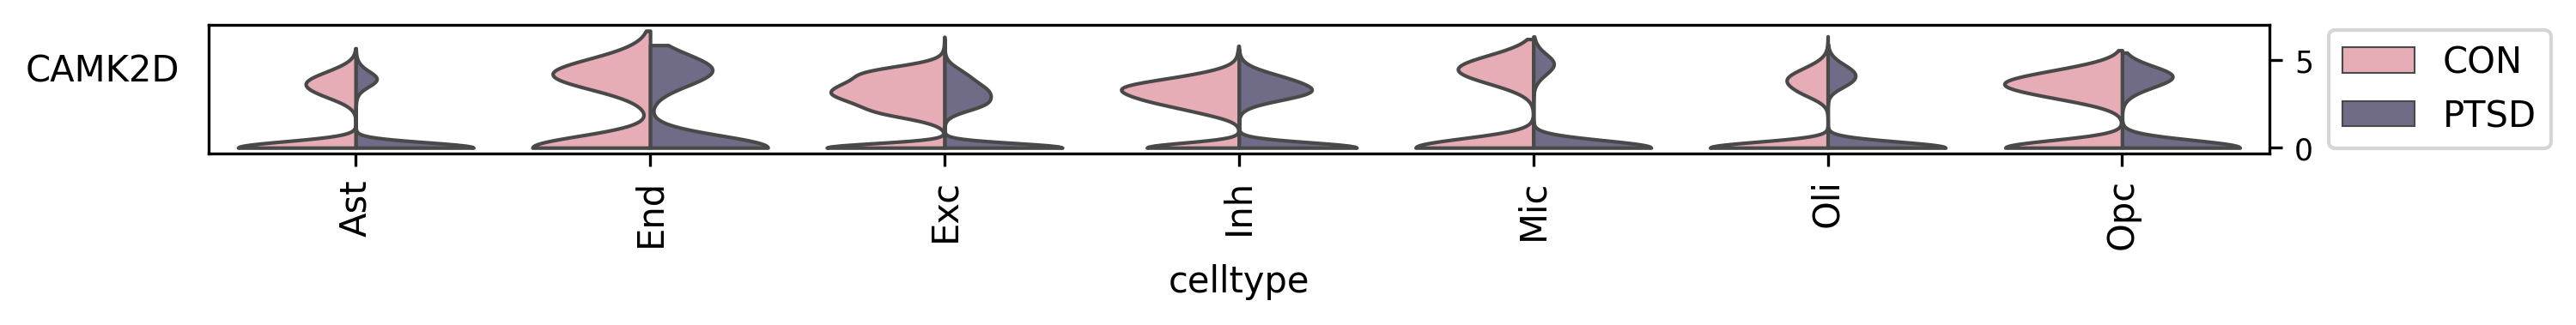

In [13]:
for gene in select_genes:
    print(gene)
    print(down_deg[down_deg.gene==gene])
    fig = pg.violin(ptsd_con,attrs=gene,groupby='celltype',hue='condition_merge',palette=['#F1A3AF','#6D678B'],return_fig=True)
    plt.show()

In [25]:
i=0
for switch_bin in switch_bins:
    i+=1
    bin_chr = bin_df_new.loc[switch_bin,"chr"]
    bin_start = bin_df_new.loc[switch_bin,"start"]
    bin_end = bin_df_new.loc[switch_bin,"end"]
    
    genes = gene_region[(gene_region.chr == bin_chr) & (gene_region.start>bin_start) & (gene_region.end<bin_end)].gene
    for gene in genes:
        if gene=="PDE10A":
            print(i, switch_bin, bin_chr, bin_start, bin_end)

64 1006 chr6 165000000 166000000


In [21]:
bulk_ptsd_degs = pd.read_csv("/home/zihend1/scENCORE/Data/bulk_ptsd_degs.csv")

In [23]:
bulk_ptsd_degs[bulk_ptsd_degs.Genena6me=="SLC24A2"]

,Geneid,Genename,PTSD.OFC.log2FoldChange,PTSD.OFC.padj,PTSD.dACC.log2FoldChange,PTSD.dACC.padj,PTSD.sgPFC.log2FoldChange,PTSD.sgPFC.padj,PTSD.dlPFC.log2FoldChange,PTSD.dlPFC.padj,Description
11432,ENSG00000155886,SLC24A2,0.008272,0.974165,0.047141,0.900645,0.154923,0.609606,-0.029387,0.878957,solute carrier family 24 member 2 [Source:HGNC...


In [24]:
bulk_ptsd_degs[bulk_ptsd_degs.Genename=="PDE10A"]

,Geneid,Genename,PTSD.OFC.log2FoldChange,PTSD.OFC.padj,PTSD.dACC.log2FoldChange,PTSD.dACC.padj,PTSD.sgPFC.log2FoldChange,PTSD.sgPFC.padj,PTSD.dlPFC.log2FoldChange,PTSD.dlPFC.padj,Description
8909,ENSG00000112541,PDE10A,-0.067721,0.593411,0.039905,0.822542,-0.263694,0.494198,-0.03907,0.803806,phosphodiesterase 10A [Source:HGNC Symbol;Acc:...
